In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import admg_rkhs2
import pandas as pd
from sklearn.preprocessing import StandardScaler

/opt/anaconda3/envs/admg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# sin

In [2]:
np.random.seed(0)
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[0.5, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
x1 = epsilon[:, 0]
# x1 = torch.randn(n_samples)
x1_true = epsilon[:, 0]
x2 = 10*torch.sin(x1)
# Step 4: Combine these results into a new tensor of shape [n, 2]
X = torch.stack((x1, x2), dim=1)
x2_true = 10*torch.sin(x1)+ epsilon[:, 1]
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs2.Sigma_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs2.Sigma_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
final_W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6)
print("final_W1: ", final_W1)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------

Minimize s=1.0 -- lr=0.005


  0%|          | 9/33000.0 [00:00<22:38, 24.29it/s]  


Inner iteration 0
	h(W(model)): 0.03653977770452577
	score(model): 2.522612252158961
Step 0: mle = 24.788235344132996
Step 0: mse = 12.430189188287645
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 1.0030]], grad_fn=<DiagEmbedBackward0>)


  3%|▎         | 1016/33000.0 [00:11<05:25, 98.12it/s]


Inner iteration 1000
	h(W(model)): 0.012709784589230999
	score(model): 0.16113806769285696
Step 1000: mle = 1.4825880429323095
Step 1000: mse = 0.9593803363867297
Step 1000: Sigma = tensor([[0.3855, 0.0000],
        [0.0000, 1.4451]], grad_fn=<DiagEmbedBackward0>)


  6%|▌         | 2020/33000.0 [00:21<05:04, 101.70it/s]


Inner iteration 2000
	h(W(model)): 0.012714969362385808
	score(model): 0.16121888638327886
Step 2000: mle = 1.4833428336844587
Step 2000: mse = 0.9585105674561478
Step 2000: Sigma = tensor([[0.3857, 0.0000],
        [0.0000, 1.3937]], grad_fn=<DiagEmbedBackward0>)


  9%|▉         | 3013/33000.0 [00:31<05:05, 98.25it/s] 


Inner iteration 3000
	h(W(model)): 0.012729799547887666
	score(model): 0.16120521793031994
Step 3000: mle = 1.483057498019856
Step 3000: mse = 0.9584214248951091
Step 3000: Sigma = tensor([[0.3856, 0.0000],
        [0.0000, 1.3932]], grad_fn=<DiagEmbedBackward0>)


 12%|█▏        | 4014/33000.0 [00:41<05:00, 96.54it/s] 


Inner iteration 4000
	h(W(model)): 0.012733850491009946
	score(model): 0.16119955256629517
Step 4000: mle = 1.4829603344832278
Step 4000: mse = 0.9584013298680553
Step 4000: Sigma = tensor([[0.3855, 0.0000],
        [0.0000, 1.3932]], grad_fn=<DiagEmbedBackward0>)


 15%|█▌        | 5010/33000.0 [00:51<04:46, 97.53it/s] 


Inner iteration 4999
	h(W(model)): 0.01273574582393433
	score(model): 0.1611969842746062
Step 4999: mle = 1.4829156929222551
Step 4999: mse = 0.9583921566320867
Step 4999: Sigma = tensor([[0.3855, 0.0000],
        [0.0000, 1.3932]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=2 -- mu: 0.05 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.5038761049982092
	score(model): 1.625689293649974
Step 0: mle = 2.4302775876769935
Step 0: mse = 1.4176981107678361
Step 0: Sigma = tensor([[0.3885, 0.0000],
        [0.0000, 1.3962]], grad_fn=<DiagEmbedBackward0>)
Found h negative -1.8109493943358248 at iter 2

Minimize s=1 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.45694732782294967
	score(model): 0.5478280180857817
Step 0: mle = 1.8140645007213596
Step 0: mse = 1.0974744364507847
Step 0: Sigma = tensor([[0.3885, 0.0000],
        [0.0000, 1.3962]], grad_fn=<DiagEmbedBackward0>)


 18%|█▊        | 6014/33000.0 [01:02<04:44, 94.75it/s]


Inner iteration 1000
	h(W(model)): 0.0029557027119153645
	score(model): 0.0845798229366957
Step 1000: mle = 1.6307826258042386
Step 1000: mse = 0.992593526787387
Step 1000: Sigma = tensor([[0.4335, 0.0000],
        [0.0000, 1.3199]], grad_fn=<DiagEmbedBackward0>)


 21%|██▏       | 7014/33000.0 [01:12<04:30, 96.15it/s]


Inner iteration 2000
	h(W(model)): 0.0029278253487046157
	score(model): 0.08460057024917506
Step 2000: mle = 1.6317496977239798
Step 2000: mse = 0.9927648601886704
Step 2000: Sigma = tensor([[0.4341, 0.0000],
        [0.0000, 1.3155]], grad_fn=<DiagEmbedBackward0>)


 24%|██▍       | 8020/33000.0 [01:23<04:18, 96.62it/s]


Inner iteration 3000
	h(W(model)): 0.0029191174888918425
	score(model): 0.08460144737856554
Step 3000: mle = 1.6319413829787677
Step 3000: mse = 0.9928067181891584
Step 3000: Sigma = tensor([[0.4342, 0.0000],
        [0.0000, 1.3155]], grad_fn=<DiagEmbedBackward0>)


 27%|██▋       | 9014/33000.0 [01:33<04:13, 94.44it/s]


Inner iteration 4000
	h(W(model)): 0.0029168907715471093
	score(model): 0.08460256459672096
Step 4000: mle = 1.6320082594020164
Step 4000: mse = 0.9928215132464591
Step 4000: Sigma = tensor([[0.4342, 0.0000],
        [0.0000, 1.3155]], grad_fn=<DiagEmbedBackward0>)


 30%|███       | 10013/33000.0 [01:46<04:28, 85.60it/s]


Inner iteration 4999
	h(W(model)): 0.002916298976916032
	score(model): 0.0846032687859407
Step 4999: mle = 1.632034178647671
Step 4999: mse = 0.9928272462171701
Step 4999: Sigma = tensor([[0.4342, 0.0000],
        [0.0000, 1.3155]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=3 -- mu: 0.025 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.2225236190889479
	score(model): 0.2709140569872716
Step 0: mle = 1.9333927273486027
Step 0: mse = 1.1135472686786163
Step 0: Sigma = tensor([[0.4372, 0.0000],
        [0.0000, 1.3125]], grad_fn=<DiagEmbedBackward0>)


 33%|███▎      | 11012/33000.0 [01:57<03:56, 93.04it/s]


Inner iteration 1000
	h(W(model)): 0.0007332753152162752
	score(model): 0.04400189253619454
Step 1000: mle = 1.7290467492477775
Step 1000: mse = 1.0193012277517468
Step 1000: Sigma = tensor([[0.4505, 0.0000],
        [0.0000, 1.2172]], grad_fn=<DiagEmbedBackward0>)


 36%|███▋      | 12022/33000.0 [02:08<03:42, 94.21it/s]


Inner iteration 2000
	h(W(model)): 0.0007223286776296689
	score(model): 0.04402486024182206
Step 2000: mle = 1.7303904146471145
Step 2000: mse = 1.0194461993711506
Step 2000: Sigma = tensor([[0.4503, 0.0000],
        [0.0000, 1.2132]], grad_fn=<DiagEmbedBackward0>)


 39%|███▉      | 13013/33000.0 [02:19<04:05, 81.38it/s]


Inner iteration 3000
	h(W(model)): 0.0007204402527820619
	score(model): 0.044025126911930085
Step 3000: mle = 1.7304765845944334
Step 3000: mse = 1.0194681237002188
Step 3000: Sigma = tensor([[0.4504, 0.0000],
        [0.0000, 1.2132]], grad_fn=<DiagEmbedBackward0>)


 42%|████▏     | 14012/33000.0 [02:30<03:56, 80.45it/s]


Inner iteration 4000
	h(W(model)): 0.0007199554975967359
	score(model): 0.044025492954527144
Step 4000: mle = 1.7305106165233415
Step 4000: mse = 1.0194761224215407
Step 4000: Sigma = tensor([[0.4504, 0.0000],
        [0.0000, 1.2132]], grad_fn=<DiagEmbedBackward0>)


 46%|████▌     | 15018/33000.0 [02:42<03:14, 92.51it/s]


Inner iteration 4999
	h(W(model)): 0.0007198195014082032
	score(model): 0.044025732436978375
Step 4999: mle = 1.730525635839994
Step 4999: mse = 1.0194796415248395
Step 4999: Sigma = tensor([[0.4504, 0.0000],
        [0.0000, 1.2132]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=4 -- mu: 0.0125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.22877506599734065
	score(model): 0.25430869277301105
Step 0: mle = 2.0407497515168798
Step 0: mse = 1.1407973220179297
Step 0: Sigma = tensor([[0.4534, 0.0000],
        [0.0000, 1.2102]], grad_fn=<DiagEmbedBackward0>)


 48%|████▊     | 16004/33000.0 [02:53<03:04, 92.03it/s]


Inner iteration 1000
	h(W(model)): 0.00019065496552705952
	score(model): 0.023174937060891562
Step 1000: mle = 1.8369847296711252
Step 1000: mse = 1.044592669756003
Step 1000: Sigma = tensor([[0.4461, 0.0000],
        [0.0000, 1.0819]], grad_fn=<DiagEmbedBackward0>)


 52%|█████▏    | 17018/33000.0 [03:05<03:04, 86.51it/s]


Inner iteration 2000
	h(W(model)): 0.0001890458121813765
	score(model): 0.023161049934821844
Step 2000: mle = 1.8360460781985004
Step 2000: mse = 1.0464179441537622
Step 2000: Sigma = tensor([[0.4460, 0.0000],
        [0.0000, 1.0914]], grad_fn=<DiagEmbedBackward0>)


 55%|█████▍    | 18017/33000.0 [03:16<02:59, 83.44it/s]


Inner iteration 3000
	h(W(model)): 0.0001885478702039478
	score(model): 0.023161102440806196
Step 3000: mle = 1.8360897854444986
Step 3000: mse = 1.0464262702036524
Step 3000: Sigma = tensor([[0.4460, 0.0000],
        [0.0000, 1.0914]], grad_fn=<DiagEmbedBackward0>)


 58%|█████▊    | 19017/33000.0 [03:30<03:10, 73.32it/s]


Inner iteration 4000
	h(W(model)): 0.0001884221199226488
	score(model): 0.023161205995786742
Step 4000: mle = 1.8361081317692187
Step 4000: mse = 1.0464307275452078
Step 4000: Sigma = tensor([[0.4460, 0.0000],
        [0.0000, 1.0914]], grad_fn=<DiagEmbedBackward0>)


 61%|██████    | 20020/33000.0 [03:40<02:18, 93.84it/s]


Inner iteration 4999
	h(W(model)): 0.00021151477871406144
	score(model): 0.02318364691852442
Step 4999: mle = 1.8360558865596666
Step 4999: mse = 1.0463900197446303
Step 4999: Sigma = tensor([[0.4461, 0.0000],
        [0.0000, 1.0913]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=5 -- mu: 0.00625 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 4.8710895966469305
	score(model): 4.884213051542955
Step 0: mle = 2.0986847168345433
Step 0: mse = 1.1557752016747092
Step 0: Sigma = tensor([[0.4491, 0.0000],
        [0.0000, 1.0883]], grad_fn=<DiagEmbedBackward0>)
Found h negative -0.9113921252541157 at iter 2

Minimize s=1 -- lr=0.00125

Inner iteration 0
	h(W(model)): 0.31445752833785257
	score(model): 0.3265385497903959
Step 0: mle = 1.9336369109296692
Step 0: mse = 1.0825646034908
Step 0: Sigma = tensor([[0.4431, 0.0000],
        [0.0000, 1.0883]], grad_fn=<DiagEmbedBackward0>)


 64%|██████▎   | 21019/33000.0 [03:51<02:04, 96.45it/s]


Inner iteration 1000
	h(W(model)): 5.6655044829767576e-05
	score(model): 0.01260205775349935
Step 1000: mle = 2.0054619000632234
Step 1000: mse = 1.0800651112473096
Step 1000: Sigma = tensor([[0.4260, 0.0000],
        [0.0000, 0.9443]], grad_fn=<DiagEmbedBackward0>)


 67%|██████▋   | 22021/33000.0 [04:02<01:59, 91.73it/s]


Inner iteration 2000
	h(W(model)): 5.262611547518503e-05
	score(model): 0.01252643759262151
Step 2000: mle = 1.9940948669752556
Step 2000: mse = 1.0813613821541974
Step 2000: Sigma = tensor([[0.4261, 0.0000],
        [0.0000, 0.9623]], grad_fn=<DiagEmbedBackward0>)


 70%|██████▉   | 23017/33000.0 [04:14<01:51, 89.81it/s]


Inner iteration 3000
	h(W(model)): 5.242527404014652e-05
	score(model): 0.012526934221815384
Step 3000: mle = 1.9942053711778684
Step 3000: mse = 1.0813727169631264
Step 3000: Sigma = tensor([[0.4261, 0.0000],
        [0.0000, 0.9622]], grad_fn=<DiagEmbedBackward0>)


 73%|███████▎  | 24020/33000.0 [04:26<01:51, 80.27it/s]


Inner iteration 4000
	h(W(model)): 5.236294043964307e-05
	score(model): 0.012526944138426834
Step 4000: mle = 1.9942169252551107
Step 4000: mse = 1.0813755367808138
Step 4000: Sigma = tensor([[0.4261, 0.0000],
        [0.0000, 0.9622]], grad_fn=<DiagEmbedBackward0>)


 76%|███████▌  | 25017/33000.0 [04:37<01:26, 92.65it/s]


Inner iteration 4999
	h(W(model)): 5.234511419871524e-05
	score(model): 0.012526961426714311
Step 4999: mle = 1.9942225438111187
Step 4999: mse = 1.0813768702434865
Step 4999: Sigma = tensor([[0.4261, 0.0000],
        [0.0000, 0.9622]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=6 -- mu: 0.003125 ------------------------------

Minimize s=1.0 -- lr=0.00125

Inner iteration 0
	h(W(model)): 0.05752691867218118
	score(model): 0.06424439735829872
Step 0: mle = 2.152153426913943
Step 0: mse = 1.1308829341151003
Step 0: Sigma = tensor([[0.4231, 0.0000],
        [0.0000, 0.9592]], grad_fn=<DiagEmbedBackward0>)


 79%|███████▉  | 26016/33000.0 [04:49<01:27, 79.44it/s]


Inner iteration 1000
	h(W(model)): 1.7312642911271325e-05
	score(model): 0.0071201734704950245
Step 1000: mle = 2.271160627032961
Step 1000: mse = 1.1379113813588273
Step 1000: Sigma = tensor([[0.3935, 0.0000],
        [0.0000, 0.8360]], grad_fn=<DiagEmbedBackward0>)


 82%|████████▏ | 27020/33000.0 [05:00<01:06, 90.17it/s]


Inner iteration 2000
	h(W(model)): 1.554876336129496e-05
	score(model): 0.007113913510875424
Step 2000: mle = 2.2697606814656845
Step 2000: mse = 1.139470817312926
Step 2000: Sigma = tensor([[0.3937, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)


 85%|████████▍ | 28019/33000.0 [05:11<00:55, 90.13it/s]


Inner iteration 3000
	h(W(model)): 1.5489937474910676e-05
	score(model): 0.0071139046254727265
Step 3000: mle = 2.26977657120168
Step 3000: mse = 1.139483806749055
Step 3000: Sigma = tensor([[0.3937, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)


 88%|████████▊ | 29022/33000.0 [05:22<00:42, 93.02it/s]


Inner iteration 4000
	h(W(model)): 1.5477690188170357e-05
	score(model): 0.007113920658452064
Step 4000: mle = 2.2697856171041964
Step 4000: mse = 1.1394859025392599
Step 4000: Sigma = tensor([[0.3937, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)


 91%|█████████ | 30021/33000.0 [05:33<00:32, 90.77it/s]


Inner iteration 5000
	h(W(model)): 7.241682548908557e-05
	score(model): 0.007171074747902559
Step 5000: mle = 2.2698545779408006
Step 5000: mse = 1.1395159726835435
Step 5000: Sigma = tensor([[0.3937, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)


 94%|█████████▍| 31023/33000.0 [05:44<00:20, 94.31it/s]


Inner iteration 6000
	h(W(model)): 2.7372476651521538e-05
	score(model): 0.007124965589216503
Step 6000: mle = 2.2695142290534256
Step 6000: mse = 1.1393735646736753
Step 6000: Sigma = tensor([[0.3937, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)


 97%|█████████▋| 32023/33000.0 [05:55<00:10, 97.63it/s]


Inner iteration 7000
	h(W(model)): 1.862915739891946e-05
	score(model): 0.007117167182990426
Step 7000: mle = 2.2698160683312594
Step 7000: mse = 1.139498368268157
Step 7000: Sigma = tensor([[0.3937, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)


33004it [06:05, 90.25it/s]                             


Inner iteration 7999
	h(W(model)): 2.1982140352427848e-05
	score(model): 0.007120723143353176
Step 7999: mle = 2.2698758029198394
Step 7999: mse = 1.1395046276310383
Step 7999: Sigma = tensor([[0.3937, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)
final_W1:  tensor([[1.0000e-08, 8.5168e+00],
        [5.5050e-04, 1.0000e-08]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.3937, 0.0000],
        [0.0000, 0.8398]], grad_fn=<DiagEmbedBackward0>)
final_W1:  [[1.00000000e-08 8.51679574e+00]
 [5.50498792e-04 1.00000000e-08]]
Empirical Covariance Matrix: [[0.49684325 0.00285144]
 [0.00285144 1.53782405]]
estimated Sigma:  [[0.39368821 0.        ]
 [0.         0.83984199]]


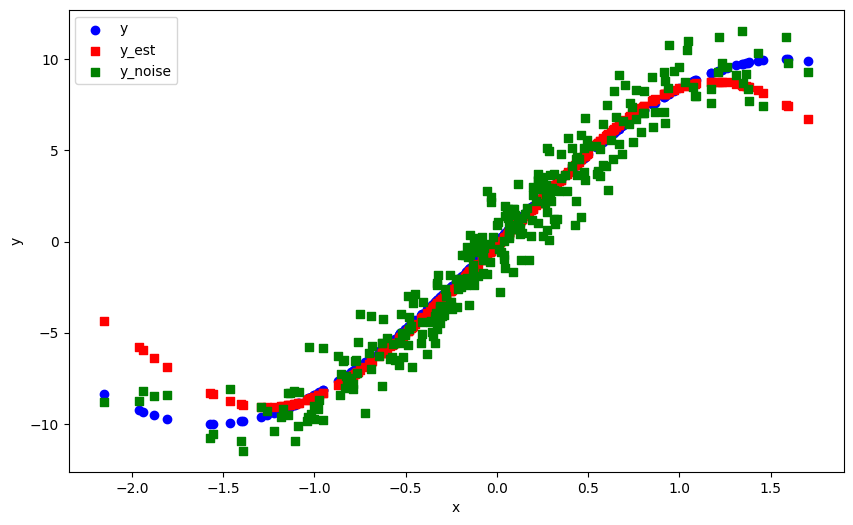

The programm is closed


In [3]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='green', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

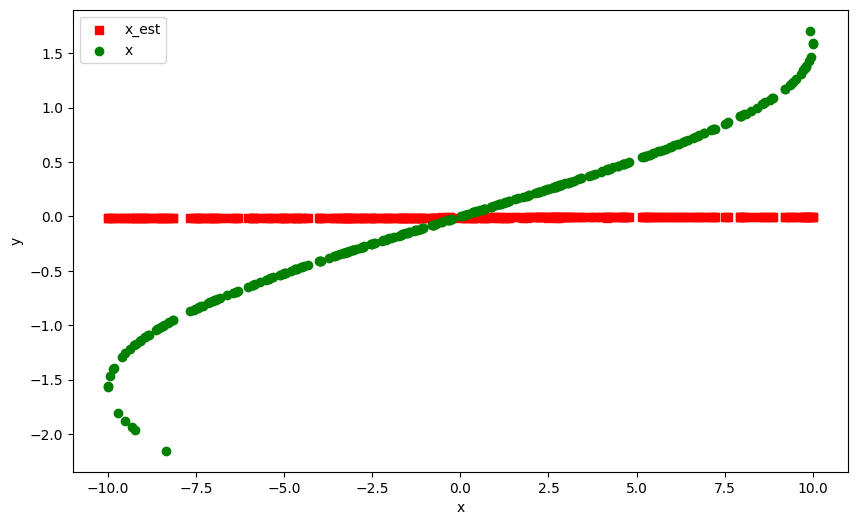

The programm is closed


In [4]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

## Standardize

In [26]:
np.random.seed(0)
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[0.5, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
x1 = epsilon[:, 0]
# x1 = torch.randn(n_samples)
x1_true = epsilon[:, 0]
x2 = 10*torch.sin(x1)
# Step 4: Combine these results into a new tensor of shape [n, 2]
X = torch.stack((x1, x2), dim=1)
X = X.numpy()
scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(X))
x2_true = 10*torch.sin(x1)+ epsilon[:, 1]
X_true = torch.stack((x1_true, x2_true), dim=1)
X_true = X_true.numpy()
scaler = StandardScaler()
X_true = torch.tensor(scaler.fit_transform(X_true))
eq_model2 = admg_rkhs2.Sigma_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs2.Sigma_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
final_W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6)
print("final_W1: ", final_W1)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 8/33000.0 [00:00<07:19, 75.01it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.40895114470477256
	score(model): 0.472349298943155
Step 0: mle = 0.629423243291805
Step 0: mse = 0.3167629819950723
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 0.9970]], grad_fn=<DiagEmbedBackward0>)
Found h negative -2.860163598536372 at iter 2

Minimize s=1 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.1098390493620507
	score(model): 0.2105293805131761
Step 0: mle = 1.0036957154234603
Step 0: mse = 0.5033378093601061
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 0.9970]], grad_fn=<DiagEmbedBackward0>)


  3%|▎         | 1014/33000.0 [00:10<05:20, 99.85it/s]


Inner iteration 1000
	h(W(model)): 0.012338685574838767
	score(model): -0.06267414948367027
Step 1000: mle = -0.7503429815189655
Step 1000: mse = 0.4372718819558199
Step 1000: Sigma = tensor([[0.0785, 0.0000],
        [0.0000, 0.7725]], grad_fn=<DiagEmbedBackward0>)


  6%|▌         | 2015/33000.0 [00:20<05:12, 99.28it/s] 


Inner iteration 2000
	h(W(model)): 0.01249522343572944
	score(model): -0.06273854727905155
Step 2000: mle = -0.7525563905765922
Step 2000: mse = 0.4364853053647289
Step 2000: Sigma = tensor([[0.0804, 0.0000],
        [0.0000, 0.7697]], grad_fn=<DiagEmbedBackward0>)


  9%|▉         | 3014/33000.0 [00:29<04:57, 100.83it/s]


Inner iteration 3000
	h(W(model)): 0.012496280673386704
	score(model): -0.0627416491078605
Step 3000: mle = -0.7525980014017355
Step 3000: mse = 0.436477534283911
Step 3000: Sigma = tensor([[0.0804, 0.0000],
        [0.0000, 0.7697]], grad_fn=<DiagEmbedBackward0>)


 12%|█▏        | 4015/33000.0 [00:39<04:40, 103.46it/s]


Inner iteration 4000
	h(W(model)): 0.012478834869135334
	score(model): -0.06273680628440306
Step 4000: mle = -0.7523750962753981
Step 4000: mse = 0.43656215382973
Step 4000: Sigma = tensor([[0.0804, 0.0000],
        [0.0000, 0.7697]], grad_fn=<DiagEmbedBackward0>)


 15%|█▌        | 5015/33000.0 [00:49<04:34, 101.89it/s]


Inner iteration 4999
	h(W(model)): 0.012486165060343534
	score(model): -0.06274043634083078
Step 4999: mle = -0.7524847118501627
Step 4999: mse = 0.436524801074328
Step 4999: Sigma = tensor([[0.0804, 0.0000],
        [0.0000, 0.7697]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=2 -- mu: 0.05 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.22065812624020392
	score(model): 0.3104017764563077
Step 0: mle = 1.7339850946153246
Step 0: mse = 0.8661496113460699
Step 0: Sigma = tensor([[0.0834, 0.0000],
        [0.0000, 0.7727]], grad_fn=<DiagEmbedBackward0>)


 18%|█▊        | 6021/33000.0 [00:59<04:28, 100.59it/s]


Inner iteration 1000
	h(W(model)): 0.0030419446641649626
	score(model): -0.028484678283464397
Step 1000: mle = -0.6307399923308998
Step 1000: mse = 0.4877784963746166
Step 1000: Sigma = tensor([[0.0799, 0.0000],
        [0.0000, 0.8371]], grad_fn=<DiagEmbedBackward0>)


 21%|██▏       | 7014/33000.0 [01:09<04:20, 99.67it/s] 


Inner iteration 2000
	h(W(model)): 0.002994337519191571
	score(model): -0.028476802438002283
Step 2000: mle = -0.6296321049759492
Step 2000: mse = 0.4881876738880206
Step 2000: Sigma = tensor([[0.0802, 0.0000],
        [0.0000, 0.8374]], grad_fn=<DiagEmbedBackward0>)


 24%|██▍       | 8021/33000.0 [01:19<04:07, 100.88it/s]


Inner iteration 3000
	h(W(model)): 0.0029935378421419
	score(model): -0.028474190528990497
Step 3000: mle = -0.6295638737472653
Step 3000: mse = 0.4882010911869362
Step 3000: Sigma = tensor([[0.0802, 0.0000],
        [0.0000, 0.8374]], grad_fn=<DiagEmbedBackward0>)


 27%|██▋       | 9013/33000.0 [01:29<03:57, 100.80it/s]


Inner iteration 4000
	h(W(model)): 0.002993387730563514
	score(model): -0.028474021355283895
Step 4000: mle = -0.6295574878326136
Step 4000: mse = 0.4882029571647722
Step 4000: Sigma = tensor([[0.0802, 0.0000],
        [0.0000, 0.8374]], grad_fn=<DiagEmbedBackward0>)


 30%|███       | 10011/33000.0 [01:39<03:49, 99.98it/s] 


Inner iteration 4999
	h(W(model)): 0.0029933607698057908
	score(model): -0.028474011019152062
Step 4999: mle = -0.6295567417982766
Step 4999: mse = 0.48820328474981145
Step 4999: Sigma = tensor([[0.0802, 0.0000],
        [0.0000, 0.8374]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=3 -- mu: 0.025 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.2604566718901792
	score(model): 0.3053728285993458
Step 0: mle = 1.7390516296523568
Step 0: mse = 0.932118305377322
Step 0: Sigma = tensor([[0.0832, 0.0000],
        [0.0000, 0.8404]], grad_fn=<DiagEmbedBackward0>)


 33%|███▎      | 11022/33000.0 [01:49<03:37, 101.00it/s]


Inner iteration 1000
	h(W(model)): 0.0007882994906909371
	score(model): -0.01342451942370795
Step 1000: mle = -0.5687068410834435
Step 1000: mse = 0.5131675693311881
Step 1000: Sigma = tensor([[0.0818, 0.0000],
        [0.0000, 0.8311]], grad_fn=<DiagEmbedBackward0>)


 36%|███▋      | 12019/33000.0 [01:59<03:26, 101.73it/s]


Inner iteration 2000
	h(W(model)): 0.0008029537096521667
	score(model): -0.013429755578945997
Step 2000: mle = -0.5695131042216492
Step 2000: mse = 0.5129383132955436
Step 2000: Sigma = tensor([[0.0802, 0.0000],
        [0.0000, 0.8309]], grad_fn=<DiagEmbedBackward0>)


 39%|███▉      | 13019/33000.0 [02:09<03:16, 101.45it/s]


Inner iteration 3000
	h(W(model)): 0.0008025527424021312
	score(model): -0.013429299942411682
Step 3000: mle = -0.5694788474236643
Step 3000: mse = 0.5129469765525557
Step 3000: Sigma = tensor([[0.0802, 0.0000],
        [0.0000, 0.8309]], grad_fn=<DiagEmbedBackward0>)


 42%|████▏     | 14018/33000.0 [02:19<03:03, 103.19it/s]


Inner iteration 4000
	h(W(model)): 0.0008025511238904605
	score(model): -0.013429283458453284
Step 4000: mle = -0.5694781232014741
Step 4000: mse = 0.5129471190164607
Step 4000: Sigma = tensor([[0.0802, 0.0000],
        [0.0000, 0.8309]], grad_fn=<DiagEmbedBackward0>)


 46%|████▌     | 15015/33000.0 [02:28<02:57, 101.28it/s]


Inner iteration 4999
	h(W(model)): 0.0008025484419147646
	score(model): -0.013429282537102828
Step 4999: mle = -0.569477979050629
Step 4999: mse = 0.5129471867192825
Step 4999: Sigma = tensor([[0.0802, 0.0000],
        [0.0000, 0.8309]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=4 -- mu: 0.0125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.2786959599264589
	score(model): 0.30178068630503796
Step 0: mle = 1.7900689079275196
Step 0: mse = 0.9633992313239728
Step 0: Sigma = tensor([[0.0832, 0.0000],
        [0.0000, 0.8339]], grad_fn=<DiagEmbedBackward0>)


 49%|████▊     | 16021/33000.0 [02:38<02:46, 102.18it/s]


Inner iteration 1000
	h(W(model)): 0.00024570926599054295
	score(model): -0.006330477531744468
Step 1000: mle = -0.5263645727717692
Step 1000: mse = 0.5250409774671955
Step 1000: Sigma = tensor([[0.0833, 0.0000],
        [0.0000, 0.7818]], grad_fn=<DiagEmbedBackward0>)


 52%|█████▏    | 17019/33000.0 [02:48<02:37, 101.54it/s]


Inner iteration 2000
	h(W(model)): 0.000234259207729053
	score(model): -0.006343217352799485
Step 2000: mle = -0.5264002879965815
Step 2000: mse = 0.5253522240778394
Step 2000: Sigma = tensor([[0.0801, 0.0000],
        [0.0000, 0.7803]], grad_fn=<DiagEmbedBackward0>)


 55%|█████▍    | 18021/33000.0 [02:58<02:27, 101.29it/s]


Inner iteration 3000
	h(W(model)): 0.00023430743405621114
	score(model): -0.006343081202245279
Step 3000: mle = -0.5263931579568393
Step 3000: mse = 0.5253518795734589
Step 3000: Sigma = tensor([[0.0801, 0.0000],
        [0.0000, 0.7803]], grad_fn=<DiagEmbedBackward0>)


 58%|█████▊    | 19020/33000.0 [03:08<02:17, 101.45it/s]


Inner iteration 4000
	h(W(model)): 0.00023431452768425687
	score(model): -0.00634307718864378
Step 4000: mle = -0.5263934053715684
Step 4000: mse = 0.5253516496404116
Step 4000: Sigma = tensor([[0.0801, 0.0000],
        [0.0000, 0.7803]], grad_fn=<DiagEmbedBackward0>)


 61%|██████    | 20019/33000.0 [03:18<02:07, 101.55it/s]


Inner iteration 4999
	h(W(model)): 0.00023431462358825087
	score(model): -0.006343077191758711
Step 4999: mle = -0.5263934133344117
Step 4999: mse = 0.5253516462236631
Step 4999: Sigma = tensor([[0.0801, 0.0000],
        [0.0000, 0.7803]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=5 -- mu: 0.00625 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.2882244946152667
	score(model): 0.2999085226643351
Step 0: mle = 1.815020002350472
Step 0: mse = 0.9760168875261118
Step 0: Sigma = tensor([[0.0831, 0.0000],
        [0.0000, 0.7833]], grad_fn=<DiagEmbedBackward0>)


 64%|██████▎   | 21017/33000.0 [03:28<01:59, 100.47it/s]


Inner iteration 1000
	h(W(model)): 7.695029841431968e-05
	score(model): -0.002810126955646358
Step 1000: mle = -0.46242718543480876
Step 1000: mse = 0.5317656402277448
Step 1000: Sigma = tensor([[0.0951, 0.0000],
        [0.0000, 0.7049]], grad_fn=<DiagEmbedBackward0>)


 67%|██████▋   | 22022/33000.0 [03:38<01:50, 98.92it/s] 


Inner iteration 2000
	h(W(model)): 7.341689047038129e-05
	score(model): -0.0028946004799115313
Step 2000: mle = -0.47508279555497257
Step 2000: mse = 0.5318526084899319
Step 2000: Sigma = tensor([[0.0800, 0.0000],
        [0.0000, 0.7041]], grad_fn=<DiagEmbedBackward0>)


 70%|██████▉   | 23014/33000.0 [03:48<01:40, 99.41it/s] 


Inner iteration 3000
	h(W(model)): 7.352033781411659e-05
	score(model): -0.0028946332691158127
Step 3000: mle = -0.4751045863202772
Step 3000: mse = 0.5318465366590888
Step 3000: Sigma = tensor([[0.0800, 0.0000],
        [0.0000, 0.7041]], grad_fn=<DiagEmbedBackward0>)


 73%|███████▎  | 24017/33000.0 [03:59<01:30, 99.68it/s] 


Inner iteration 4000
	h(W(model)): 7.353234211686332e-05
	score(model): -0.0028946322255995745
Step 4000: mle = -0.47510633870921604
Step 4000: mse = 0.5318457565236615
Step 4000: Sigma = tensor([[0.0800, 0.0000],
        [0.0000, 0.7041]], grad_fn=<DiagEmbedBackward0>)


 76%|███████▌  | 25013/33000.0 [04:09<01:20, 98.61it/s] 


Inner iteration 4999
	h(W(model)): 7.35336600184122e-05
	score(model): -0.0028946322440792024
Step 4999: mle = -0.47510655271472046
Step 4999: mse = 0.5318456626635943
Step 4999: Sigma = tensor([[0.0800, 0.0000],
        [0.0000, 0.7041]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=6 -- mu: 0.003125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.28798242512937516
	score(model): 0.29416808104952097
Step 0: mle = 1.9252053498483286
Step 0: mse = 0.9820128367986413
Step 0: Sigma = tensor([[0.0830, 0.0000],
        [0.0000, 0.7071]], grad_fn=<DiagEmbedBackward0>)


 79%|███████▉  | 26019/33000.0 [04:19<01:09, 100.17it/s]


Inner iteration 1000
	h(W(model)): 3.171745787271729e-05
	score(model): -0.0011362747374453913
Step 1000: mle = -0.37363519336096873
Step 1000: mse = 0.535703248038036
Step 1000: Sigma = tensor([[0.0793, 0.0000],
        [0.0000, 0.6165]], grad_fn=<DiagEmbedBackward0>)


 82%|████████▏ | 27023/33000.0 [04:29<00:59, 99.80it/s] 


Inner iteration 2000
	h(W(model)): 2.45277821116892e-05
	score(model): -0.0012069478423826021
Step 2000: mle = -0.3942692461505226
Step 2000: mse = 0.5354719242600079
Step 2000: Sigma = tensor([[0.0798, 0.0000],
        [0.0000, 0.6161]], grad_fn=<DiagEmbedBackward0>)


 85%|████████▍ | 28020/33000.0 [04:39<00:51, 97.65it/s] 


Inner iteration 3000
	h(W(model)): 2.4532168366283753e-05
	score(model): -0.0012071747424244738
Step 3000: mle = -0.39434410800719766
Step 3000: mse = 0.5354694372699438
Step 3000: Sigma = tensor([[0.0799, 0.0000],
        [0.0000, 0.6161]], grad_fn=<DiagEmbedBackward0>)


 88%|████████▊ | 29018/33000.0 [04:50<00:43, 91.30it/s]


Inner iteration 4000
	h(W(model)): 2.4534060062085055e-05
	score(model): -0.001207181987350683
Step 4000: mle = -0.39434702550819223
Step 4000: mse = 0.5354691252648677
Step 4000: Sigma = tensor([[0.0799, 0.0000],
        [0.0000, 0.6161]], grad_fn=<DiagEmbedBackward0>)


 91%|█████████ | 30023/33000.0 [05:00<00:30, 98.07it/s]


Inner iteration 5000
	h(W(model)): 2.4581580345484838e-05
	score(model): -0.0012071263731834943
Step 5000: mle = -0.3943444421721338
Step 5000: mse = 0.5354695683413042
Step 5000: Sigma = tensor([[0.0799, 0.0000],
        [0.0000, 0.6161]], grad_fn=<DiagEmbedBackward0>)


 94%|█████████▍| 31015/33000.0 [05:10<00:20, 97.24it/s] 


Inner iteration 6000
	h(W(model)): 2.7630600902156174e-05
	score(model): -0.0012043458444711435
Step 6000: mle = -0.39443026352759514
Step 6000: mse = 0.5354408096525417
Step 6000: Sigma = tensor([[0.0799, 0.0000],
        [0.0000, 0.6161]], grad_fn=<DiagEmbedBackward0>)


 97%|█████████▋| 32017/33000.0 [05:20<00:10, 97.16it/s]


Inner iteration 7000
	h(W(model)): 2.121596967109338e-05
	score(model): -0.0012041062061005385
Step 7000: mle = -0.3923078774870108
Step 7000: mse = 0.53608588458899
Step 7000: Sigma = tensor([[0.0799, 0.0000],
        [0.0000, 0.6161]], grad_fn=<DiagEmbedBackward0>)


33002it [05:30, 99.71it/s]                              


Inner iteration 7999
	h(W(model)): 2.4237407968084735e-05
	score(model): -0.0012061992009559906
Step 7999: mle = -0.3939354301704232
Step 7999: mse = 0.53558927238215
Step 7999: Sigma = tensor([[0.0799, 0.0000],
        [0.0000, 0.6161]], grad_fn=<DiagEmbedBackward0>)
final_W1:  tensor([[1.0000e-08, 5.0168e-03],
        [9.8133e-01, 1.0000e-08]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.0799, 0.0000],
        [0.0000, 0.6161]], grad_fn=<DiagEmbedBackward0>)
final_W1:  [[1.00000000e-08 5.01677454e-03]
 [9.81331797e-01 1.00000000e-08]]
Empirical Covariance Matrix: [[0.49684325 0.00285144]
 [0.00285144 1.53782405]]
estimated Sigma:  [[0.0798524  0.        ]
 [0.         0.61610818]]


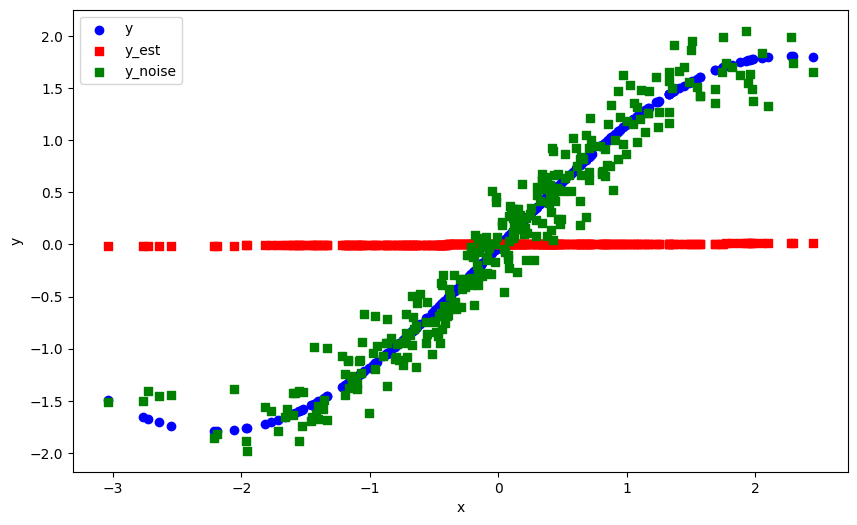

The programm is closed


In [27]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='green', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

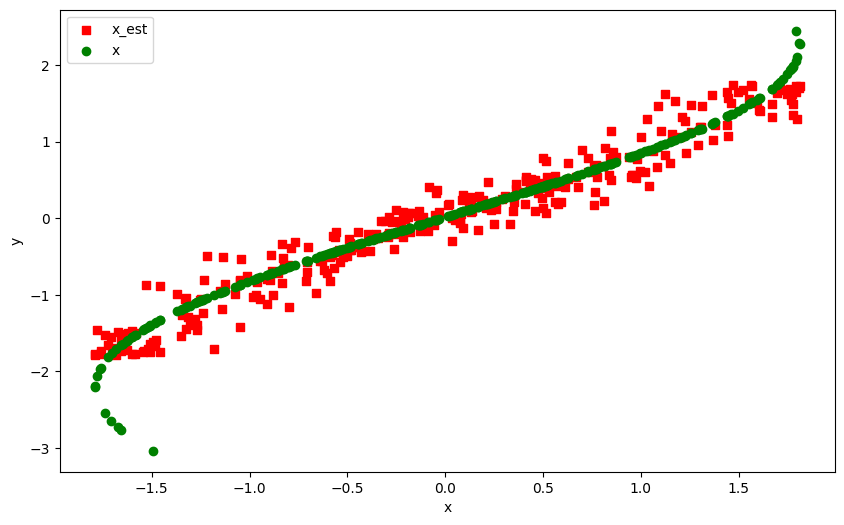

The programm is closed


In [28]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

# quadratic

In [9]:
np.random.seed(0)
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[0.5, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
x1 = epsilon[:, 0]
# x1 = torch.randn(n_samples)
x1_true = epsilon[:, 0]
x2 = x1**2
# Step 4: Combine these results into a new tensor of shape [n, 2]
X = torch.stack((x1, x2), dim=1)
x2_true = x1**2+ epsilon[:, 1]
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs2.Sigma_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs2.Sigma_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
final_W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6)
print("final_W1: ", final_W1)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 17/33000.0 [00:00<06:24, 85.76it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.31014229826690254
	score(model): 0.6150917908650306
Step 0: mle = 3.0460783351947742
Step 0: mse = 1.5246009151236786
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 1.0030]], grad_fn=<DiagEmbedBackward0>)


  3%|▎         | 1018/33000.0 [00:11<05:30, 96.70it/s]


Inner iteration 1000
	h(W(model)): 0.000927947332808432
	score(model): 0.17200586532991052
Step 1000: mle = 1.7105050681482088
Step 1000: mse = 1.009093117694389
Step 1000: Sigma = tensor([[0.4803, 0.0000],
        [0.0000, 1.3801]], grad_fn=<DiagEmbedBackward0>)


  6%|▌         | 2011/33000.0 [00:21<05:12, 99.12it/s]


Inner iteration 2000
	h(W(model)): 0.0008881306621700835
	score(model): 0.17172206730643114
Step 2000: mle = 1.7080535756972302
Step 2000: mse = 1.0079812931359853
Step 2000: Sigma = tensor([[0.4804, 0.0000],
        [0.0000, 1.3947]], grad_fn=<DiagEmbedBackward0>)


  9%|▉         | 3015/33000.0 [00:31<05:04, 98.54it/s]


Inner iteration 3000
	h(W(model)): 0.0008786382726050368
	score(model): 0.17173688086360434
Step 3000: mle = 1.7082947497479868
Step 3000: mse = 1.0080455299408124
Step 3000: Sigma = tensor([[0.4805, 0.0000],
        [0.0000, 1.3945]], grad_fn=<DiagEmbedBackward0>)


 12%|█▏        | 4016/33000.0 [00:41<04:49, 100.04it/s]


Inner iteration 4000
	h(W(model)): 0.0008766954209527
	score(model): 0.17174235283258943
Step 4000: mle = 1.7083684915391637
Step 4000: mse = 1.0080791058317884
Step 4000: Sigma = tensor([[0.4805, 0.0000],
        [0.0000, 1.3945]], grad_fn=<DiagEmbedBackward0>)


 15%|█▌        | 5018/33000.0 [00:52<04:48, 97.07it/s] 


Inner iteration 4999
	h(W(model)): 0.0008771563823039008
	score(model): 0.17174340276929123
Step 4999: mle = 1.7083745037391194
Step 4999: mse = 1.0080838197791853
Step 4999: Sigma = tensor([[0.4805, 0.0000],
        [0.0000, 1.3945]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=2 -- mu: 0.05 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.8605115820913254
	score(model): 1.0519472755509198
Step 0: mle = 3.8193743338751043
Step 0: mse = 2.0155923590860043
Step 0: Sigma = tensor([[0.4835, 0.0000],
        [0.0000, 1.3975]], grad_fn=<DiagEmbedBackward0>)


 18%|█▊        | 6012/33000.0 [01:02<04:30, 99.77it/s] 


Inner iteration 1000
	h(W(model)): 0.00023905442266025645
	score(model): 0.08715929290469926
Step 1000: mle = 1.73809612496462
Step 1000: mse = 1.018655608334771
Step 1000: Sigma = tensor([[0.4785, 0.0000],
        [0.0000, 1.3144]], grad_fn=<DiagEmbedBackward0>)


 21%|██▏       | 7013/33000.0 [01:12<04:19, 100.31it/s]


Inner iteration 2000
	h(W(model)): 0.00024582781772386486
	score(model): 0.0868004365362528
Step 2000: mle = 1.7308062403729045
Step 2000: mse = 1.0138748268487865
Step 2000: Sigma = tensor([[0.4792, 0.0000],
        [0.0000, 1.3118]], grad_fn=<DiagEmbedBackward0>)


 24%|██▍       | 8018/33000.0 [01:22<04:16, 97.29it/s] 


Inner iteration 3000
	h(W(model)): 0.0002431453738550582
	score(model): 0.08681565510340457
Step 3000: mle = 1.7311629380872544
Step 3000: mse = 1.0140807714355073
Step 3000: Sigma = tensor([[0.4792, 0.0000],
        [0.0000, 1.3120]], grad_fn=<DiagEmbedBackward0>)


 27%|██▋       | 9019/33000.0 [01:32<04:08, 96.43it/s] 


Inner iteration 4000
	h(W(model)): 0.00024281704201112309
	score(model): 0.08681717150274654
Step 4000: mle = 1.7311996693397464
Step 4000: mse = 1.014100778323785
Step 4000: Sigma = tensor([[0.4793, 0.0000],
        [0.0000, 1.3121]], grad_fn=<DiagEmbedBackward0>)


 30%|███       | 10008/33000.0 [01:42<03:50, 99.62it/s]


Inner iteration 4999
	h(W(model)): 0.0002499955481549687
	score(model): 0.08682838339096127
Step 4999: mle = 1.731282446528368
Step 4999: mse = 1.0141833920097723
Step 4999: Sigma = tensor([[0.4794, 0.0000],
        [0.0000, 1.3122]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=3 -- mu: 0.025 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 1.4108201564916119
	score(model): 1.4957664670830748
Step 0: mle = 3.389809274682369
Step 0: mse = 1.7524742650508889
Step 0: Sigma = tensor([[0.4824, 0.0000],
        [0.0000, 1.3152]], grad_fn=<DiagEmbedBackward0>)
Found h negative -1.9893587876849828 at iter 5

Minimize s=1 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.2425739237821411
	score(model): 0.29658703368329914
Step 0: mle = 2.1578687068665032
Step 0: mse = 1.2030963125962624
Step 0: Sigma = tensor([[0.4824, 0.0000],
        [0.0000, 1.3152]], grad_fn=<DiagEmbedBackward0>)


 33%|███▎      | 11016/33000.0 [01:52<03:49, 95.98it/s] 


Inner iteration 1000
	h(W(model)): 5.785706161243187e-05
	score(model): 0.04422302899551796
Step 1000: mle = 1.7662899121263713
Step 1000: mse = 1.0205922780868104
Step 1000: Sigma = tensor([[0.4726, 0.0000],
        [0.0000, 1.1981]], grad_fn=<DiagEmbedBackward0>)


 36%|███▋      | 12024/33000.0 [02:02<03:35, 97.20it/s] 


Inner iteration 2000
	h(W(model)): 6.801280191603976e-05
	score(model): 0.04422907867298018
Step 2000: mle = 1.7661606692242175
Step 2000: mse = 1.0212723190763806
Step 2000: Sigma = tensor([[0.4715, 0.0000],
        [0.0000, 1.2024]], grad_fn=<DiagEmbedBackward0>)


 39%|███▉      | 13020/33000.0 [02:12<03:24, 97.49it/s] 


Inner iteration 3000
	h(W(model)): 6.78237726832176e-05
	score(model): 0.04422950259812104
Step 3000: mle = 1.7661845452256926
Step 3000: mse = 1.021277651677738
Step 3000: Sigma = tensor([[0.4716, 0.0000],
        [0.0000, 1.2024]], grad_fn=<DiagEmbedBackward0>)


 42%|████▏     | 14024/33000.0 [02:22<03:13, 97.94it/s] 


Inner iteration 4000
	h(W(model)): 6.781733671001877e-05
	score(model): 0.044229521514900234
Step 4000: mle = 1.7661855543460998
Step 4000: mse = 1.0212779280288995
Step 4000: Sigma = tensor([[0.4716, 0.0000],
        [0.0000, 1.2024]], grad_fn=<DiagEmbedBackward0>)


 46%|████▌     | 15021/33000.0 [02:32<03:07, 95.86it/s] 


Inner iteration 4999
	h(W(model)): 6.77874520088606e-05
	score(model): 0.04422951210839779
Step 4999: mle = 1.766186401409894
Step 4999: mse = 1.0212777833736468
Step 4999: Sigma = tensor([[0.4716, 0.0000],
        [0.0000, 1.2024]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=4 -- mu: 0.0125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.31582060875071144
	score(model): 0.3422330403624327
Step 0: mle = 2.1114226531066556
Step 0: mse = 1.1227765542465606
Step 0: Sigma = tensor([[0.4746, 0.0000],
        [0.0000, 1.1994]], grad_fn=<DiagEmbedBackward0>)


 49%|████▊     | 16024/33000.0 [02:42<02:58, 94.93it/s]


Inner iteration 1000
	h(W(model)): 2.4894248842888267e-05
	score(model): 0.022966199866905252
Step 1000: mle = 1.8350374019380244
Step 1000: mse = 1.0336938350439726
Step 1000: Sigma = tensor([[0.4562, 0.0000],
        [0.0000, 1.0713]], grad_fn=<DiagEmbedBackward0>)


 52%|█████▏    | 17019/33000.0 [02:52<02:43, 97.54it/s]


Inner iteration 2000
	h(W(model)): 1.9668389805049813e-05
	score(model): 0.022895521042888944
Step 2000: mle = 1.8297942357432095
Step 2000: mse = 1.0313185659159476
Step 2000: Sigma = tensor([[0.4558, 0.0000],
        [0.0000, 1.0737]], grad_fn=<DiagEmbedBackward0>)


 55%|█████▍    | 18024/33000.0 [03:03<02:32, 97.99it/s]


Inner iteration 3000
	h(W(model)): 1.955789236640637e-05
	score(model): 0.02289060792941594
Step 3000: mle = 1.8294093488210565
Step 3000: mse = 1.0310587127689101
Step 3000: Sigma = tensor([[0.4558, 0.0000],
        [0.0000, 1.0735]], grad_fn=<DiagEmbedBackward0>)


 58%|█████▊    | 19025/33000.0 [03:13<02:22, 98.30it/s] 


Inner iteration 4000
	h(W(model)): 1.954952466853843e-05
	score(model): 0.022890452095401095
Step 4000: mle = 1.829397511847099
Step 4000: mse = 1.031050047670617
Step 4000: Sigma = tensor([[0.4558, 0.0000],
        [0.0000, 1.0735]], grad_fn=<DiagEmbedBackward0>)


 61%|██████    | 20014/33000.0 [03:23<02:14, 96.76it/s] 


Inner iteration 4999
	h(W(model)): 2.351975321990274e-05
	score(model): 0.02289521204024295
Step 4999: mle = 1.8294608624087902
Step 4999: mse = 1.031073547864148
Step 4999: Sigma = tensor([[0.4558, 0.0000],
        [0.0000, 1.0735]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=5 -- mu: 0.00625 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.7527438731857226
	score(model): 0.7661430847185735
Step 0: mle = 2.1432194309007846
Step 0: mse = 1.1361689860639248
Step 0: Sigma = tensor([[0.4588, 0.0000],
        [0.0000, 1.0705]], grad_fn=<DiagEmbedBackward0>)


 64%|██████▎   | 21018/33000.0 [03:34<02:03, 96.66it/s]


Inner iteration 1000
	h(W(model)): 1.1270774948002327e-05
	score(model): 0.012553005960289666
Step 1000: mle = 2.006334167937416
Step 1000: mse = 1.0814006533189744
Step 1000: Sigma = tensor([[0.4307, 0.0000],
        [0.0000, 0.9552]], grad_fn=<DiagEmbedBackward0>)


 67%|██████▋   | 22019/33000.0 [03:44<01:53, 96.68it/s]


Inner iteration 2000
	h(W(model)): 5.980806493388613e-06
	score(model): 0.012197586976031747
Step 2000: mle = 1.9503981171269538
Step 2000: mse = 1.0493916509250136
Step 2000: Sigma = tensor([[0.4305, 0.0000],
        [0.0000, 0.9401]], grad_fn=<DiagEmbedBackward0>)


 70%|██████▉   | 23022/33000.0 [03:55<01:44, 95.44it/s]


Inner iteration 3000
	h(W(model)): 5.915669940792512e-06
	score(model): 0.012156812227599394
Step 3000: mle = 1.9438792925705037
Step 3000: mse = 1.0453900283338196
Step 3000: Sigma = tensor([[0.4305, 0.0000],
        [0.0000, 0.9374]], grad_fn=<DiagEmbedBackward0>)


 73%|███████▎  | 24023/33000.0 [04:06<01:33, 95.71it/s]


Inner iteration 4000
	h(W(model)): 5.887125120396242e-06
	score(model): 0.012149580377290898
Step 4000: mle = 1.9427254967068035
Step 4000: mse = 1.0446802245683537
Step 4000: Sigma = tensor([[0.4305, 0.0000],
        [0.0000, 0.9370]], grad_fn=<DiagEmbedBackward0>)


 76%|███████▌  | 25023/33000.0 [04:16<01:23, 95.96it/s]


Inner iteration 4999
	h(W(model)): 5.881822624509425e-06
	score(model): 0.012148644532712092
Step 4999: mle = 1.9425763940662295
Step 4999: mse = 1.0445885850185357
Step 4999: Sigma = tensor([[0.4305, 0.0000],
        [0.0000, 0.9369]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=6 -- mu: 0.003125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.5275542668298391
	score(model): 0.5350758884128008
Step 0: mle = 2.4060561514531784
Step 0: mse = 1.1811101216052033
Step 0: Sigma = tensor([[0.4335, 0.0000],
        [0.0000, 0.9339]], grad_fn=<DiagEmbedBackward0>)


 79%|███████▉  | 26025/33000.0 [04:27<01:13, 94.85it/s]


Inner iteration 1000
	h(W(model)): 1.2144312544815072e-05
	score(model): 0.006850714843483679
Step 1000: mle = 2.1881076891208076
Step 1000: mse = 1.0940336679971827
Step 1000: Sigma = tensor([[0.3960, 0.0000],
        [0.0000, 0.8212]], grad_fn=<DiagEmbedBackward0>)


 82%|████████▏ | 27016/33000.0 [04:37<01:04, 92.98it/s]


Inner iteration 2000
	h(W(model)): 1.877238963110539e-06
	score(model): 0.0067108862488345425
Step 2000: mle = 2.1466336868402447
Step 2000: mse = 1.0691322734678101
Step 2000: Sigma = tensor([[0.3956, 0.0000],
        [0.0000, 0.8060]], grad_fn=<DiagEmbedBackward0>)


 85%|████████▍ | 28023/33000.0 [04:48<00:52, 94.79it/s]


Inner iteration 3000
	h(W(model)): 1.8617142131249764e-06
	score(model): 0.006677244409174806
Step 3000: mle = 2.135866757247194
Step 3000: mse = 1.063296001068155
Step 3000: Sigma = tensor([[0.3956, 0.0000],
        [0.0000, 0.8031]], grad_fn=<DiagEmbedBackward0>)


 88%|████████▊ | 29024/33000.0 [04:58<00:41, 95.74it/s]


Inner iteration 4000
	h(W(model)): 1.8564385034225417e-06
	score(model): 0.006670909191753839
Step 4000: mle = 2.1338396392448646
Step 4000: mse = 1.062203805660418
Step 4000: Sigma = tensor([[0.3956, 0.0000],
        [0.0000, 0.8026]], grad_fn=<DiagEmbedBackward0>)


 91%|█████████ | 30018/33000.0 [05:09<00:30, 96.24it/s]


Inner iteration 5000
	h(W(model)): 1.8556756550824893e-06
	score(model): 0.0066701808462734345
Step 5000: mle = 2.1336065532049666
Step 5000: mse = 1.0620783974788617
Step 5000: Sigma = tensor([[0.3956, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)


 94%|█████████▍| 31022/33000.0 [05:19<00:20, 96.11it/s]


Inner iteration 6000
	h(W(model)): 1.9059855573266837e-06
	score(model): 0.006670166888111494
Step 6000: mle = 2.1335861006123173
Step 6000: mse = 1.0620638200366366
Step 6000: Sigma = tensor([[0.3956, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)


 97%|█████████▋| 32024/33000.0 [05:30<00:10, 95.13it/s]


Inner iteration 7000
	h(W(model)): 3.6146977441808836e-06
	score(model): 0.006672239595763212
Step 7000: mle = 2.1337014708409523
Step 7000: mse = 1.0621226378944597
Step 7000: Sigma = tensor([[0.3956, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)


33005it [05:40, 96.95it/s]                             


Inner iteration 7999
	h(W(model)): 4.357141753175142e-06
	score(model): 0.006673255563874131
Step 7999: mle = 2.1337901831251838
Step 7999: mse = 1.062156337231954
Step 7999: Sigma = tensor([[0.3956, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)
final_W1:  tensor([[1.0000e-08, 1.2776e+00],
        [1.6338e-03, 1.0000e-08]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.3956, 0.0000],
        [0.0000, 0.8025]], grad_fn=<DiagEmbedBackward0>)
final_W1:  [[1.00000000e-08 1.27760537e+00]
 [1.63381787e-03 1.00000000e-08]]
Empirical Covariance Matrix: [[0.49684325 0.00285144]
 [0.00285144 1.53782405]]
estimated Sigma:  [[0.39563612 0.        ]
 [0.         0.80254355]]


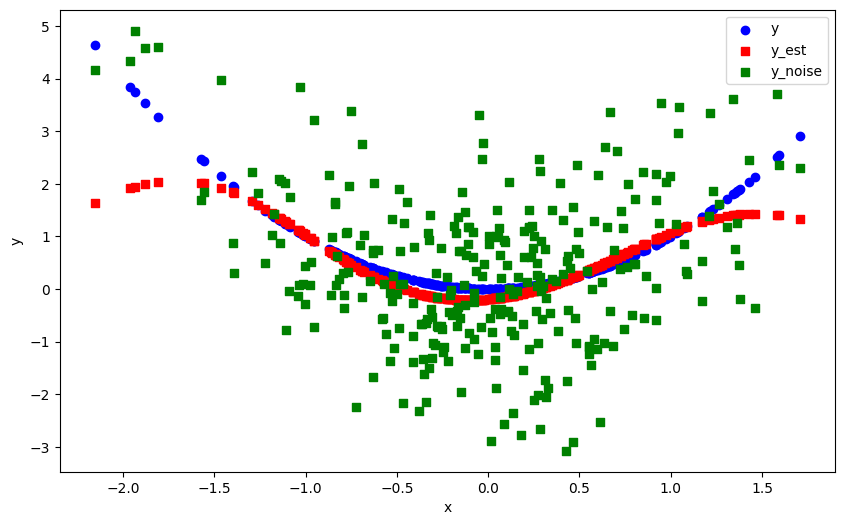

The programm is closed


In [10]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='green', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

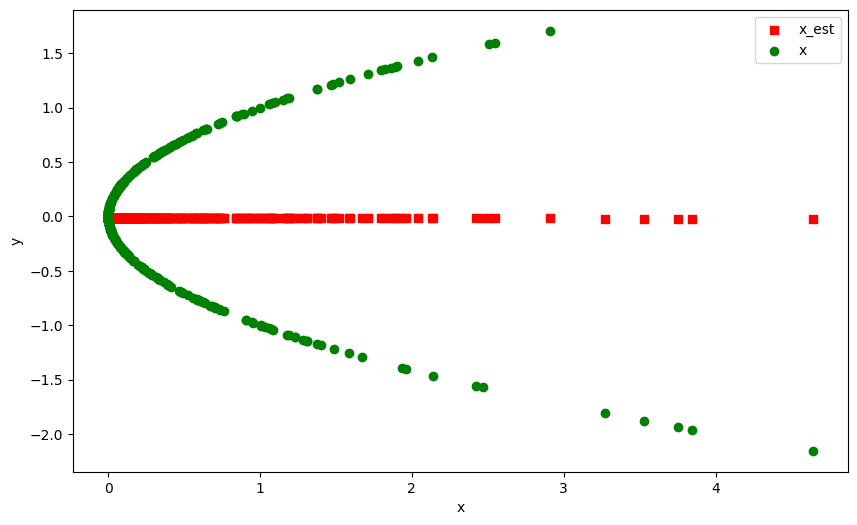

The programm is closed


In [11]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

## Standardize

In [23]:
np.random.seed(0)
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[0.5, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
x1 = epsilon[:, 0]
# x1 = torch.randn(n_samples)
x1_true = epsilon[:, 0]
x2 = x1**2
# Step 4: Combine these results into a new tensor of shape [n, 2]
X = torch.stack((x1, x2), dim=1)
X = X.numpy()
scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(X))
x2_true = x1**2+ epsilon[:, 1]
X_true = torch.stack((x1_true, x2_true), dim=1)
X_true = X_true.numpy()
scaler = StandardScaler()
X_true = torch.tensor(scaler.fit_transform(X_true))
eq_model2 = admg_rkhs2.Sigma_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs2.Sigma_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
final_W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6)
print("final_W1: ", final_W1)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 8/33000.0 [00:00<07:16, 75.67it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.016427142302096187
	score(model): 0.3141582175705278
Step 0: mle = 2.973922788266344
Step 0: mse = 1.488417782477498
Step 0: Sigma = tensor([[1.0030, 0.0000],
        [0.0000, 1.0030]], grad_fn=<DiagEmbedBackward0>)
Found h negative -2.9082770070091426 at iter 2

Minimize s=1 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.13236828696642555
	score(model): 0.3402632645983058
Step 0: mle = 2.0783978068258255
Step 0: mse = 1.0393561433494953
Step 0: Sigma = tensor([[1.0030, 0.0000],
        [0.0000, 0.9970]], grad_fn=<DiagEmbedBackward0>)


  3%|▎         | 1021/33000.0 [00:10<05:28, 97.34it/s]


Inner iteration 1000
	h(W(model)): 0.0008661327049402803
	score(model): 0.16469444666097463
Step 1000: mle = 1.6381345115026116
Step 1000: mse = 0.8451877851875479
Step 1000: Sigma = tensor([[0.9405, 0.0000],
        [0.0000, 0.6909]], grad_fn=<DiagEmbedBackward0>)


  6%|▌         | 2015/33000.0 [00:21<05:11, 99.53it/s]


Inner iteration 2000
	h(W(model)): 0.0008441654265759302
	score(model): 0.16439629539051
Step 2000: mle = 1.6353731650483765
Step 2000: mse = 0.8442742831472074
Step 2000: Sigma = tensor([[0.9411, 0.0000],
        [0.0000, 0.6893]], grad_fn=<DiagEmbedBackward0>)


  9%|▉         | 3016/33000.0 [00:31<04:57, 100.92it/s]


Inner iteration 3000
	h(W(model)): 0.0008422517483368055
	score(model): 0.16436713009542656
Step 3000: mle = 1.6351004172404968
Step 3000: mse = 0.84418413810655
Step 3000: Sigma = tensor([[0.9412, 0.0000],
        [0.0000, 0.6891]], grad_fn=<DiagEmbedBackward0>)


 12%|█▏        | 4014/33000.0 [00:41<04:50, 99.74it/s] 


Inner iteration 4000
	h(W(model)): 0.0008421475062357353
	score(model): 0.16436538992007768
Step 4000: mle = 1.635084044777459
Step 4000: mse = 0.844178654801697
Step 4000: Sigma = tensor([[0.9412, 0.0000],
        [0.0000, 0.6891]], grad_fn=<DiagEmbedBackward0>)


 15%|█▌        | 5017/33000.0 [00:51<04:41, 99.28it/s] 


Inner iteration 4999
	h(W(model)): 0.0008421498656982424
	score(model): 0.1643653879580387
Step 4999: mle = 1.635084001576947
Step 4999: mse = 0.8441786288961095
Step 4999: Sigma = tensor([[0.9412, 0.0000],
        [0.0000, 0.6891]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=2 -- mu: 0.05 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.13338182684337865
	score(model): 0.24470175694803892
Step 0: mle = 2.223614197661629
Step 0: mse = 1.0745830340762008
Step 0: Sigma = tensor([[0.9442, 0.0000],
        [0.0000, 0.6921]], grad_fn=<DiagEmbedBackward0>)


 18%|█▊        | 6018/33000.0 [01:01<04:30, 99.76it/s] 


Inner iteration 1000
	h(W(model)): 0.0002423570586132766
	score(model): 0.08303935041946738
Step 1000: mle = 1.6557985630320857
Step 1000: mse = 0.8514469183208937
Step 1000: Sigma = tensor([[0.9139, 0.0000],
        [0.0000, 0.6796]], grad_fn=<DiagEmbedBackward0>)


 21%|██▏       | 7018/33000.0 [01:11<04:20, 99.75it/s] 


Inner iteration 2000
	h(W(model)): 0.0002519096764756456
	score(model): 0.08306046734352318
Step 2000: mle = 1.6560284540679577
Step 2000: mse = 0.8515401517237697
Step 2000: Sigma = tensor([[0.9139, 0.0000],
        [0.0000, 0.6812]], grad_fn=<DiagEmbedBackward0>)


 24%|██▍       | 8013/33000.0 [01:21<04:07, 100.87it/s]


Inner iteration 3000
	h(W(model)): 0.0002519328964311469
	score(model): 0.08306258228961046
Step 3000: mle = 1.6560702920292036
Step 3000: mse = 0.8515551282771449
Step 3000: Sigma = tensor([[0.9139, 0.0000],
        [0.0000, 0.6812]], grad_fn=<DiagEmbedBackward0>)


 27%|██▋       | 9017/33000.0 [01:31<04:01, 99.21it/s] 


Inner iteration 4000
	h(W(model)): 0.0002519276011609868
	score(model): 0.08306260819918289
Step 4000: mle = 1.6560709163392968
Step 4000: mse = 0.8515553854475949
Step 4000: Sigma = tensor([[0.9139, 0.0000],
        [0.0000, 0.6812]], grad_fn=<DiagEmbedBackward0>)


 30%|███       | 10013/33000.0 [01:41<04:04, 94.07it/s] 


Inner iteration 4999
	h(W(model)): 0.0002532458194360929
	score(model): 0.0830641423672086
Step 4999: mle = 1.6560753928452767
Step 4999: mse = 0.8515585097418329
Step 4999: Sigma = tensor([[0.9140, 0.0000],
        [0.0000, 0.6812]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=3 -- mu: 0.025 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.12603441617927694
	score(model): 0.1816576769232597
Step 0: mle = 2.221975162175607
Step 0: mse = 1.0698371603202383
Step 0: Sigma = tensor([[0.9170, 0.0000],
        [0.0000, 0.6842]], grad_fn=<DiagEmbedBackward0>)


 33%|███▎      | 11022/33000.0 [01:52<03:52, 94.59it/s] 


Inner iteration 1000
	h(W(model)): 7.389048636080935e-05
	score(model): 0.04217104163924197
Step 1000: mle = 1.6837463029024478
Step 1000: mse = 0.858688221992218
Step 1000: Sigma = tensor([[0.8650, 0.0000],
        [0.0000, 0.6645]], grad_fn=<DiagEmbedBackward0>)


 36%|███▋      | 12017/33000.0 [02:02<03:38, 95.89it/s] 


Inner iteration 2000
	h(W(model)): 7.447374103554657e-05
	score(model): 0.04217053288515586
Step 2000: mle = 1.6837020373672478
Step 2000: mse = 0.8586566722346505
Step 2000: Sigma = tensor([[0.8651, 0.0000],
        [0.0000, 0.6641]], grad_fn=<DiagEmbedBackward0>)


 39%|███▉      | 13013/33000.0 [02:12<03:27, 96.47it/s] 


Inner iteration 3000
	h(W(model)): 7.447979263037432e-05
	score(model): 0.04217150787500592
Step 3000: mle = 1.6837408419051623
Step 3000: mse = 0.8586702941529735
Step 3000: Sigma = tensor([[0.8651, 0.0000],
        [0.0000, 0.6641]], grad_fn=<DiagEmbedBackward0>)


 42%|████▏     | 14014/33000.0 [02:22<03:15, 96.91it/s] 


Inner iteration 4000
	h(W(model)): 7.447915551974444e-05
	score(model): 0.04217152038757768
Step 4000: mle = 1.6837413682727687
Step 4000: mse = 0.8586704917179395
Step 4000: Sigma = tensor([[0.8651, 0.0000],
        [0.0000, 0.6641]], grad_fn=<DiagEmbedBackward0>)


 46%|████▌     | 15020/33000.0 [02:32<03:05, 96.83it/s] 


Inner iteration 4999
	h(W(model)): 7.444704014248591e-05
	score(model): 0.04217150198255461
Step 4999: mle = 1.6837419114532202
Step 4999: mse = 0.8586707464594681
Step 4999: Sigma = tensor([[0.8651, 0.0000],
        [0.0000, 0.6641]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=4 -- mu: 0.0125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.118528551878023
	score(model): 0.14620640052788203
Step 0: mle = 2.210933153410175
Step 0: mse = 1.0559413463144007
Step 0: Sigma = tensor([[0.8681, 0.0000],
        [0.0000, 0.6671]], grad_fn=<DiagEmbedBackward0>)


 49%|████▊     | 16017/33000.0 [02:43<02:58, 95.39it/s]


Inner iteration 1000
	h(W(model)): 2.619095342442505e-05
	score(model): 0.02161952314907154
Step 1000: mle = 1.7273248031076882
Step 1000: mse = 0.8658160079800084
Step 1000: Sigma = tensor([[0.7952, 0.0000],
        [0.0000, 0.6354]], grad_fn=<DiagEmbedBackward0>)


 52%|█████▏    | 17022/33000.0 [02:53<02:44, 97.15it/s]


Inner iteration 2000
	h(W(model)): 2.252325407395959e-05
	score(model): 0.021623748104601444
Step 2000: mle = 1.7279582436099417
Step 2000: mse = 0.8659020475791182
Step 2000: Sigma = tensor([[0.7956, 0.0000],
        [0.0000, 0.6332]], grad_fn=<DiagEmbedBackward0>)


 55%|█████▍    | 18017/33000.0 [03:03<02:38, 94.79it/s]


Inner iteration 3000
	h(W(model)): 2.2522567450835397e-05
	score(model): 0.021623993868993645
Step 3000: mle = 1.727978099674721
Step 3000: mse = 0.8659082165077365
Step 3000: Sigma = tensor([[0.7956, 0.0000],
        [0.0000, 0.6332]], grad_fn=<DiagEmbedBackward0>)


 58%|█████▊    | 19014/33000.0 [03:14<02:26, 95.53it/s]


Inner iteration 4000
	h(W(model)): 2.2522221916445895e-05
	score(model): 0.021623994540924167
Step 4000: mle = 1.727978182408086
Step 4000: mse = 0.8659082516760583
Step 4000: Sigma = tensor([[0.7956, 0.0000],
        [0.0000, 0.6332]], grad_fn=<DiagEmbedBackward0>)


 61%|██████    | 20020/33000.0 [03:24<02:13, 97.04it/s]


Inner iteration 4999
	h(W(model)): 2.264441746366185e-05
	score(model): 0.02162405844858506
Step 4999: mle = 1.7279738466962467
Step 4999: mse = 0.8659103890543984
Step 4999: Sigma = tensor([[0.7956, 0.0000],
        [0.0000, 0.6333]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=5 -- mu: 0.00625 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.09923941284884882
	score(model): 0.11257914763588421
Step 0: mle = 2.1344262074246716
Step 0: mse = 1.0134894339167757
Step 0: Sigma = tensor([[0.7926, 0.0000],
        [0.0000, 0.6363]], grad_fn=<DiagEmbedBackward0>)


 64%|██████▎   | 21020/33000.0 [03:35<02:03, 97.14it/s]


Inner iteration 1000
	h(W(model)): 7.4026358636544e-06
	score(model): 0.01128776570594904
Step 1000: mle = 1.8047285670128184
Step 1000: mse = 0.8732505400196149
Step 1000: Sigma = tensor([[0.7112, 0.0000],
        [0.0000, 0.5870]], grad_fn=<DiagEmbedBackward0>)


 67%|██████▋   | 22022/33000.0 [03:45<01:52, 97.45it/s]


Inner iteration 2000
	h(W(model)): 7.240820468081989e-06
	score(model): 0.011290768650998678
Step 2000: mle = 1.8052262741480816
Step 2000: mse = 0.8732942772563242
Step 2000: Sigma = tensor([[0.7109, 0.0000],
        [0.0000, 0.5867]], grad_fn=<DiagEmbedBackward0>)


 70%|██████▉   | 23022/33000.0 [03:55<01:41, 98.24it/s]


Inner iteration 3000
	h(W(model)): 7.24789084873519e-06
	score(model): 0.011290735035876706
Step 3000: mle = 1.8052198038020353
Step 3000: mse = 0.8732917234501701
Step 3000: Sigma = tensor([[0.7109, 0.0000],
        [0.0000, 0.5867]], grad_fn=<DiagEmbedBackward0>)


 73%|███████▎  | 24016/33000.0 [04:05<01:32, 97.34it/s]


Inner iteration 4000
	h(W(model)): 8.804082450674596e-06
	score(model): 0.011291978140975342
Step 4000: mle = 1.8051700252104446
Step 4000: mse = 0.8732737770330229
Step 4000: Sigma = tensor([[0.7109, 0.0000],
        [0.0000, 0.5867]], grad_fn=<DiagEmbedBackward0>)


 76%|███████▌  | 25017/33000.0 [04:16<01:23, 96.05it/s]


Inner iteration 4999
	h(W(model)): 8.529915981944663e-06
	score(model): 0.011291645765401462
Step 4999: mle = 1.8051605430996012
Step 4999: mse = 0.8732704163873306
Step 4999: Sigma = tensor([[0.7109, 0.0000],
        [0.0000, 0.5867]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=6 -- mu: 0.003125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.14513957086507268
	score(model): 0.1516705630566231
Step 0: mle = 2.094055265301838
Step 0: mse = 0.9726784777854062
Step 0: Sigma = tensor([[0.7079, 0.0000],
        [0.0000, 0.5837]], grad_fn=<DiagEmbedBackward0>)


 79%|███████▉  | 26013/33000.0 [04:26<01:12, 96.68it/s]


Inner iteration 1000
	h(W(model)): 2.8798115231078806e-06
	score(model): 0.006066171792989734
Step 1000: mle = 1.9402035762603906
Step 1000: mse = 0.880769444388738
Step 1000: Sigma = tensor([[0.6196, 0.0000],
        [0.0000, 0.5268]], grad_fn=<DiagEmbedBackward0>)


 82%|████████▏ | 27011/33000.0 [04:36<01:04, 92.95it/s]


Inner iteration 2000
	h(W(model)): 2.5492080108428894e-06
	score(model): 0.0060656365103122665
Step 2000: mle = 1.9400536921628126
Step 2000: mse = 0.8807883340003954
Step 2000: Sigma = tensor([[0.6192, 0.0000],
        [0.0000, 0.5276]], grad_fn=<DiagEmbedBackward0>)


 85%|████████▍ | 28015/33000.0 [04:47<00:53, 93.94it/s]


Inner iteration 3000
	h(W(model)): 2.5486027043827218e-06
	score(model): 0.0060655399637846805
Step 3000: mle = 1.9400234101694158
Step 3000: mse = 0.8807871938350379
Step 3000: Sigma = tensor([[0.6192, 0.0000],
        [0.0000, 0.5276]], grad_fn=<DiagEmbedBackward0>)


 88%|████████▊ | 29021/33000.0 [04:58<00:41, 95.33it/s]


Inner iteration 4000
	h(W(model)): 2.548430010194418e-06
	score(model): 0.006065539402234671
Step 4000: mle = 1.9400232821816505
Step 4000: mse = 0.880787213577685
Step 4000: Sigma = tensor([[0.6192, 0.0000],
        [0.0000, 0.5276]], grad_fn=<DiagEmbedBackward0>)


 91%|█████████ | 30016/33000.0 [05:08<00:30, 96.56it/s]


Inner iteration 5000
	h(W(model)): 2.548412650591943e-06
	score(model): 0.006065539424273367
Step 5000: mle = 1.9400232948141054
Step 5000: mse = 0.8807872180547407
Step 5000: Sigma = tensor([[0.6192, 0.0000],
        [0.0000, 0.5276]], grad_fn=<DiagEmbedBackward0>)


 94%|█████████▍| 31015/33000.0 [05:18<00:20, 96.09it/s]


Inner iteration 6000
	h(W(model)): 2.565549250028814e-06
	score(model): 0.0060655185055663915
Step 6000: mle = 1.9400112070963327
Step 6000: mse = 0.8807827814001432
Step 6000: Sigma = tensor([[0.6192, 0.0000],
        [0.0000, 0.5276]], grad_fn=<DiagEmbedBackward0>)


 97%|█████████▋| 32013/33000.0 [05:29<00:10, 95.87it/s]


Inner iteration 7000
	h(W(model)): 3.2022794742054446e-06
	score(model): 0.0060661037989896485
Step 7000: mle = 1.9399953624930373
Step 7000: mse = 0.8807788129250279
Step 7000: Sigma = tensor([[0.6192, 0.0000],
        [0.0000, 0.5276]], grad_fn=<DiagEmbedBackward0>)


33002it [05:39, 97.24it/s]                             


Inner iteration 7999
	h(W(model)): 5.403256131647566e-06
	score(model): 0.006068152631055988
Step 7999: mle = 1.939948492166352
Step 7999: mse = 0.8807650419111963
Step 7999: Sigma = tensor([[0.6192, 0.0000],
        [0.0000, 0.5276]], grad_fn=<DiagEmbedBackward0>)
final_W1:  tensor([[1.0000e-08, 6.6423e-01],
        [3.4995e-03, 1.0000e-08]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.6192, 0.0000],
        [0.0000, 0.5276]], grad_fn=<DiagEmbedBackward0>)
final_W1:  [[1.00000000e-08 6.64234279e-01]
 [3.49949927e-03 1.00000000e-08]]
Empirical Covariance Matrix: [[0.49684325 0.00285144]
 [0.00285144 1.53782405]]
estimated Sigma:  [[0.61916618 0.        ]
 [0.         0.52763473]]


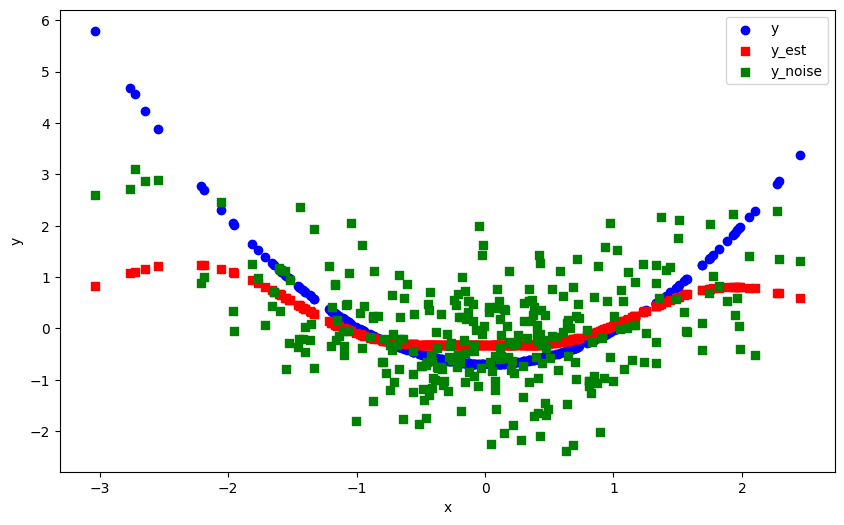

The programm is closed


In [24]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='green', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

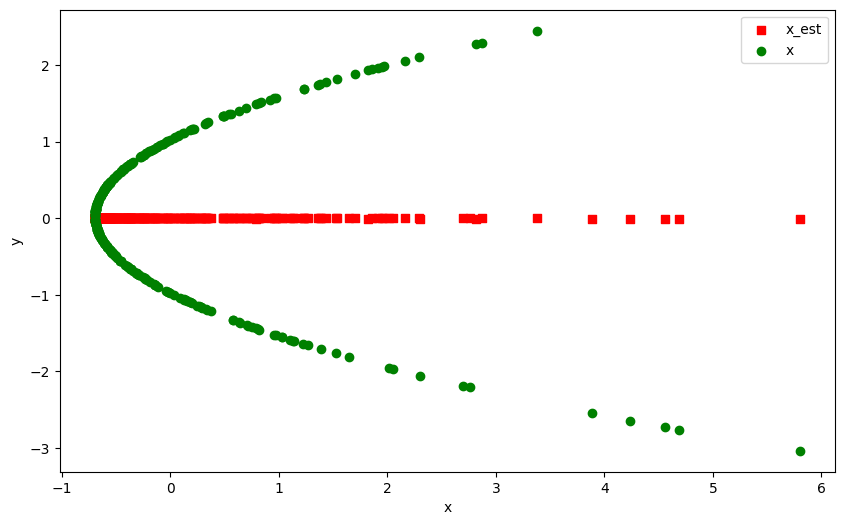

The programm is closed


In [25]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

# qubic

In [15]:
np.random.seed(0)
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[0.5, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
x1 = epsilon[:, 0]
# x1 = torch.randn(n_samples)
x1_true = epsilon[:, 0]
x2 = x1**3 + x1
# Step 4: Combine these results into a new tensor of shape [n, 2]
X = torch.stack((x1, x2), dim=1)
x2_true = x1**3 + x1+ epsilon[:, 1]
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs2.Sigma_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs2.Sigma_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
final_W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6)
print("final_W1: ", final_W1)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 8/33000.0 [00:00<07:10, 76.61it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.5654077066201015
	score(model): 0.9961282371876674
Step 0: mle = 4.2966914345997855
Step 0: mse = 2.1534076584062025
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 1.0030]], grad_fn=<DiagEmbedBackward0>)


  3%|▎         | 1018/33000.0 [00:12<06:15, 85.07it/s]


Inner iteration 1000
	h(W(model)): 0.01003071088392904
	score(model): 0.1672566035723854
Step 1000: mle = 1.5717498730781823
Step 1000: mse = 1.034488510792255
Step 1000: Sigma = tensor([[0.3856, 0.0000],
        [0.0000, 1.6408]], grad_fn=<DiagEmbedBackward0>)


  6%|▌         | 2019/33000.0 [00:23<05:21, 96.34it/s]


Inner iteration 2000
	h(W(model)): 0.009566646618121233
	score(model): 0.1655054091486663
Step 2000: mle = 1.5588570939866397
Step 2000: mse = 1.0127424053090717
Step 2000: Sigma = tensor([[0.3887, 0.0000],
        [0.0000, 1.4760]], grad_fn=<DiagEmbedBackward0>)


  9%|▉         | 3020/33000.0 [00:33<05:09, 96.91it/s]


Inner iteration 3000
	h(W(model)): 0.009520783645538433
	score(model): 0.16529862457960962
Step 3000: mle = 1.557244534082207
Step 3000: mse = 1.0106873694936653
Step 3000: Sigma = tensor([[0.3891, 0.0000],
        [0.0000, 1.4705]], grad_fn=<DiagEmbedBackward0>)


 12%|█▏        | 4014/33000.0 [00:43<05:01, 96.06it/s]


Inner iteration 4000
	h(W(model)): 0.009518313145750579
	score(model): 0.16527333762059915
Step 4000: mle = 1.5570162068471565
Step 4000: mse = 1.010475576595928
Step 4000: Sigma = tensor([[0.3891, 0.0000],
        [0.0000, 1.4701]], grad_fn=<DiagEmbedBackward0>)


 15%|█▌        | 5018/33000.0 [00:54<04:48, 97.13it/s]


Inner iteration 4999
	h(W(model)): 0.009526978960828547
	score(model): 0.1652929688761732
Step 4999: mle = 1.5571259945342038
Step 4999: mse = 1.0105130870963395
Step 4999: Sigma = tensor([[0.3891, 0.0000],
        [0.0000, 1.4701]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=2 -- mu: 0.05 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): -0.4121013832668401
	score(model): -0.2698987953818549
Step 0: mle = 2.835750169802453
Step 0: mse = 1.4935947242852803
Step 0: Sigma = tensor([[0.3921, 0.0000],
        [0.0000, 1.4731]], grad_fn=<DiagEmbedBackward0>)
Found h negative -0.4121013832668401 at iter 1

Minimize s=1 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.9318350889736327
	score(model): 1.0309063648986294
Step 0: mle = 1.9780361191688094
Step 0: mse = 1.156519608642953
Step 0: Sigma = tensor([[0.3921, 0.0000],
        [0.0000, 1.4731]], grad_fn=<DiagEmbedBackward0>)


 18%|█▊        | 6019/33000.0 [01:04<04:46, 94.33it/s] 


Inner iteration 1000
	h(W(model)): 0.002463265864815156
	score(model): 0.08906723439202696
Step 1000: mle = 1.7315394151834005
Step 1000: mse = 1.0726498903414676
Step 1000: Sigma = tensor([[0.4334, 0.0000],
        [0.0000, 1.4157]], grad_fn=<DiagEmbedBackward0>)


 21%|██▏       | 7016/33000.0 [01:14<04:34, 94.69it/s] 


Inner iteration 2000
	h(W(model)): 0.002394360050746336
	score(model): 0.08815642598869794
Step 2000: mle = 1.714701295941045
Step 2000: mse = 1.0585713843446092
Step 2000: Sigma = tensor([[0.4327, 0.0000],
        [0.0000, 1.4011]], grad_fn=<DiagEmbedBackward0>)


 24%|██▍       | 8012/33000.0 [01:24<04:20, 95.96it/s] 


Inner iteration 3000
	h(W(model)): 0.0023858039687685295
	score(model): 0.08818070194671007
Step 3000: mle = 1.7153578103822729
Step 3000: mse = 1.0589150335483544
Step 3000: Sigma = tensor([[0.4328, 0.0000],
        [0.0000, 1.4016]], grad_fn=<DiagEmbedBackward0>)


 27%|██▋       | 9012/33000.0 [01:35<04:06, 97.20it/s] 


Inner iteration 4000
	h(W(model)): 0.002384444001368058
	score(model): 0.08818296841877493
Step 4000: mle = 1.715430323767977
Step 4000: mse = 1.0589318606452671
Step 4000: Sigma = tensor([[0.4329, 0.0000],
        [0.0000, 1.4016]], grad_fn=<DiagEmbedBackward0>)


 30%|███       | 10017/33000.0 [01:45<04:02, 94.66it/s]


Inner iteration 4999
	h(W(model)): 0.002384027192130933
	score(model): 0.08818407171432141
Step 4999: mle = 1.7154607234345698
Step 4999: mse = 1.058938087970939
Step 4999: Sigma = tensor([[0.4329, 0.0000],
        [0.0000, 1.4016]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=3 -- mu: 0.025 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.3429146822735796
	score(model): 0.3989161255854172
Step 0: mle = 2.2372379821857113
Step 0: mse = 1.2270256163379214
Step 0: Sigma = tensor([[0.4359, 0.0000],
        [0.0000, 1.3986]], grad_fn=<DiagEmbedBackward0>)


 33%|███▎      | 11020/33000.0 [01:55<03:51, 95.00it/s]


Inner iteration 1000
	h(W(model)): 0.0006204964773566246
	score(model): 0.04686291697320508
Step 1000: mle = 1.8491667260995872
Step 1000: mse = 1.111207669165319
Step 1000: Sigma = tensor([[0.4486, 0.0000],
        [0.0000, 1.3122]], grad_fn=<DiagEmbedBackward0>)


 36%|███▋      | 12014/33000.0 [02:06<03:36, 96.81it/s]


Inner iteration 2000
	h(W(model)): 0.0006110224631798999
	score(model): 0.04697967115344256
Step 2000: mle = 1.8542035192045936
Step 2000: mse = 1.114382460510461
Step 2000: Sigma = tensor([[0.4491, 0.0000],
        [0.0000, 1.3110]], grad_fn=<DiagEmbedBackward0>)


 39%|███▉      | 13016/33000.0 [02:16<03:28, 95.67it/s]


Inner iteration 3000
	h(W(model)): 0.0006103121438325587
	score(model): 0.04698008475208533
Step 3000: mle = 1.8542487504456349
Step 3000: mse = 1.1143790482350109
Step 3000: Sigma = tensor([[0.4491, 0.0000],
        [0.0000, 1.3110]], grad_fn=<DiagEmbedBackward0>)


 42%|████▏     | 14017/33000.0 [02:27<03:20, 94.68it/s]


Inner iteration 4000
	h(W(model)): 0.0006101598831014243
	score(model): 0.04698048231036192
Step 4000: mle = 1.8542707413760608
Step 4000: mse = 1.1143838426614139
Step 4000: Sigma = tensor([[0.4491, 0.0000],
        [0.0000, 1.3110]], grad_fn=<DiagEmbedBackward0>)


 46%|████▌     | 15019/33000.0 [02:38<03:05, 96.92it/s]


Inner iteration 4999
	h(W(model)): 0.0006102424563767528
	score(model): 0.0469806136708645
Step 4999: mle = 1.8542725754770313
Step 4999: mse = 1.1143829807282035
Step 4999: Sigma = tensor([[0.4491, 0.0000],
        [0.0000, 1.3110]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=4 -- mu: 0.0125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.406226056919061
	score(model): 0.4360313041523074
Step 0: mle = 2.3819859685969034
Step 0: mse = 1.285986976922908
Step 0: Sigma = tensor([[0.4521, 0.0000],
        [0.0000, 1.3080]], grad_fn=<DiagEmbedBackward0>)


 49%|████▊     | 16013/33000.0 [02:48<02:53, 97.65it/s]


Inner iteration 1000
	h(W(model)): 0.00017613076495970326
	score(model): 0.025320453974720054
Step 1000: mle = 2.01090776773942
Step 1000: mse = 1.1739149931807573
Step 1000: Sigma = tensor([[0.4447, 0.0000],
        [0.0000, 1.1953]], grad_fn=<DiagEmbedBackward0>)


 52%|█████▏    | 17011/33000.0 [02:58<02:45, 96.46it/s]


Inner iteration 2000
	h(W(model)): 0.00016392739665738176
	score(model): 0.025333773954835267
Step 2000: mle = 2.0130492016077746
Step 2000: mse = 1.174251170778296
Step 2000: Sigma = tensor([[0.4452, 0.0000],
        [0.0000, 1.1916]], grad_fn=<DiagEmbedBackward0>)


 55%|█████▍    | 18018/33000.0 [03:09<02:34, 97.16it/s]


Inner iteration 3000
	h(W(model)): 0.00016376726952094245
	score(model): 0.025335357703643143
Step 3000: mle = 2.013187556468547
Step 3000: mse = 1.1742777591747362
Step 3000: Sigma = tensor([[0.4453, 0.0000],
        [0.0000, 1.1915]], grad_fn=<DiagEmbedBackward0>)


 58%|█████▊    | 19018/33000.0 [03:19<02:29, 93.64it/s]


Inner iteration 4000
	h(W(model)): 0.00016374751685011013
	score(model): 0.025335484349193915
Step 4000: mle = 2.0131992554553975
Step 4000: mse = 1.1742803571009892
Step 4000: Sigma = tensor([[0.4453, 0.0000],
        [0.0000, 1.1915]], grad_fn=<DiagEmbedBackward0>)


 61%|██████    | 20014/33000.0 [03:29<02:19, 93.35it/s]


Inner iteration 4999
	h(W(model)): 0.00016382376794354947
	score(model): 0.025335581384270785
Step 4999: mle = 2.013200982409831
Step 4999: mse = 1.1742832178959908
Step 4999: Sigma = tensor([[0.4453, 0.0000],
        [0.0000, 1.1915]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=5 -- mu: 0.00625 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.42945238541824393
	score(model): 0.4455155157177501
Step 0: mle = 2.568099131166179
Step 0: mse = 1.3527240282283746
Step 0: Sigma = tensor([[0.4483, 0.0000],
        [0.0000, 1.1885]], grad_fn=<DiagEmbedBackward0>)


 64%|██████▎   | 21017/33000.0 [03:40<02:05, 95.34it/s]


Inner iteration 1000
	h(W(model)): 5.5564223104376254e-05
	score(model): 0.013966147921256049
Step 1000: mle = 2.2252375564707405
Step 1000: mse = 1.2441323349391809
Step 1000: Sigma = tensor([[0.4258, 0.0000],
        [0.0000, 1.0730]], grad_fn=<DiagEmbedBackward0>)


 67%|██████▋   | 22019/33000.0 [03:50<01:55, 95.32it/s]


Inner iteration 2000
	h(W(model)): 4.7641135543896596e-05
	score(model): 0.013959658436578393
Step 2000: mle = 2.225396691998572
Step 2000: mse = 1.234513607821216
Step 2000: Sigma = tensor([[0.4256, 0.0000],
        [0.0000, 1.0516]], grad_fn=<DiagEmbedBackward0>)


 70%|██████▉   | 23019/33000.0 [04:01<01:43, 96.41it/s]


Inner iteration 3000
	h(W(model)): 4.7621639158057505e-05
	score(model): 0.013959710222981179
Step 3000: mle = 2.22540804653491
Step 3000: mse = 1.2344937587531444
Step 3000: Sigma = tensor([[0.4256, 0.0000],
        [0.0000, 1.0516]], grad_fn=<DiagEmbedBackward0>)


 73%|███████▎  | 24020/33000.0 [04:12<01:33, 95.67it/s]


Inner iteration 4000
	h(W(model)): 4.763264132323641e-05
	score(model): 0.01395975053829226
Step 4000: mle = 2.225412755588378
Step 4000: mse = 1.2344952053565557
Step 4000: Sigma = tensor([[0.4256, 0.0000],
        [0.0000, 1.0516]], grad_fn=<DiagEmbedBackward0>)


 76%|███████▌  | 25011/33000.0 [04:22<01:23, 95.63it/s]


Inner iteration 4999
	h(W(model)): 4.76738886208139e-05
	score(model): 0.013959727211787152
Step 4999: mle = 2.2254023111035632
Step 4999: mse = 1.2344858040448647
Step 4999: Sigma = tensor([[0.4256, 0.0000],
        [0.0000, 1.0515]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=6 -- mu: 0.003125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.9996925086670194
	score(model): 1.0083752762607194
Step 0: mle = 2.777509064210233
Step 0: mse = 1.412438128833282
Step 0: Sigma = tensor([[0.4286, 0.0000],
        [0.0000, 1.0485]], grad_fn=<DiagEmbedBackward0>)


 79%|███████▉  | 26013/33000.0 [04:33<01:19, 88.39it/s]


Inner iteration 1000
	h(W(model)): 5.3822809885417655e-05
	score(model): 0.008853429640284204
Step 1000: mle = 2.816292945064201
Step 1000: mse = 1.4857383681732508
Step 1000: Sigma = tensor([[0.3921, 0.0000],
        [0.0000, 0.9851]], grad_fn=<DiagEmbedBackward0>)


 82%|████████▏ | 27014/33000.0 [04:43<01:01, 96.64it/s]


Inner iteration 2000
	h(W(model)): 1.566744349656979e-05
	score(model): 0.007965720873856571
Step 2000: mle = 2.5435277267629965
Step 2000: mse = 1.3024545698484595
Step 2000: Sigma = tensor([[0.3931, 0.0000],
        [0.0000, 0.9098]], grad_fn=<DiagEmbedBackward0>)


 85%|████████▍ | 28012/33000.0 [04:54<00:53, 94.04it/s]


Inner iteration 3000
	h(W(model)): 1.538525002686697e-05
	score(model): 0.007941188124760419
Step 3000: mle = 2.5357594350595307
Step 3000: mse = 1.297556139631298
Step 3000: Sigma = tensor([[0.3932, 0.0000],
        [0.0000, 0.9078]], grad_fn=<DiagEmbedBackward0>)


 88%|████████▊ | 29012/33000.0 [05:05<00:42, 94.88it/s]


Inner iteration 4000
	h(W(model)): 1.5352122901157728e-05
	score(model): 0.00794044574220653
Step 4000: mle = 2.5355320146226297
Step 4000: mse = 1.297405868076237
Step 4000: Sigma = tensor([[0.3933, 0.0000],
        [0.0000, 0.9077]], grad_fn=<DiagEmbedBackward0>)


 91%|█████████ | 30014/33000.0 [05:15<00:30, 96.92it/s]


Inner iteration 5000
	h(W(model)): 1.5348468271891846e-05
	score(model): 0.007940450811396165
Step 5000: mle = 2.5355347976385127
Step 5000: mse = 1.2974052859731686
Step 5000: Sigma = tensor([[0.3933, 0.0000],
        [0.0000, 0.9077]], grad_fn=<DiagEmbedBackward0>)


 94%|█████████▍| 31014/33000.0 [05:26<00:20, 96.81it/s]


Inner iteration 6000
	h(W(model)): 2.1027664374173582e-05
	score(model): 0.007946449895572867
Step 6000: mle = 2.5356396348633563
Step 6000: mse = 1.2973456215885195
Step 6000: Sigma = tensor([[0.3932, 0.0000],
        [0.0000, 0.9076]], grad_fn=<DiagEmbedBackward0>)


 97%|█████████▋| 32017/33000.0 [05:36<00:10, 96.88it/s]


Inner iteration 7000
	h(W(model)): 3.411225983351862e-05
	score(model): 0.007964800747911607
Step 7000: mle = 2.5372998698191873
Step 7000: mse = 1.2986270283936419
Step 7000: Sigma = tensor([[0.3932, 0.0000],
        [0.0000, 0.9082]], grad_fn=<DiagEmbedBackward0>)


33001it [05:47, 95.08it/s]                             


Inner iteration 7999
	h(W(model)): 3.8357093275820375e-05
	score(model): 0.007970346845569586
Step 7999: mle = 2.5377425591268317
Step 7999: mse = 1.2989126448143302
Step 7999: Sigma = tensor([[0.3932, 0.0000],
        [0.0000, 0.9085]], grad_fn=<DiagEmbedBackward0>)
final_W1:  tensor([[1.0000e-08, 2.4626e+00],
        [2.5149e-03, 1.0000e-08]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.3932, 0.0000],
        [0.0000, 0.9085]], grad_fn=<DiagEmbedBackward0>)
final_W1:  [[1.00000000e-08 2.46262341e+00]
 [2.51489974e-03 1.00000000e-08]]
Empirical Covariance Matrix: [[0.49684325 0.00285144]
 [0.00285144 1.53782405]]
estimated Sigma:  [[0.39324619 0.        ]
 [0.         0.90852486]]


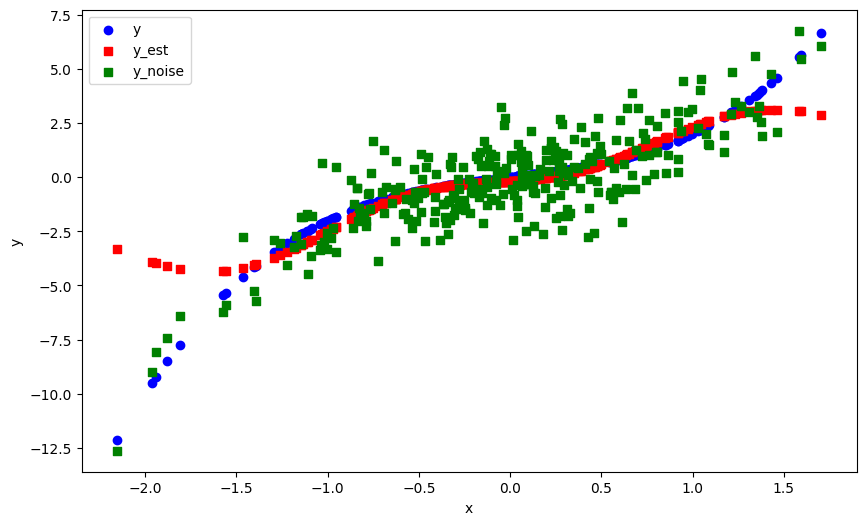

The programm is closed


In [18]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='green', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

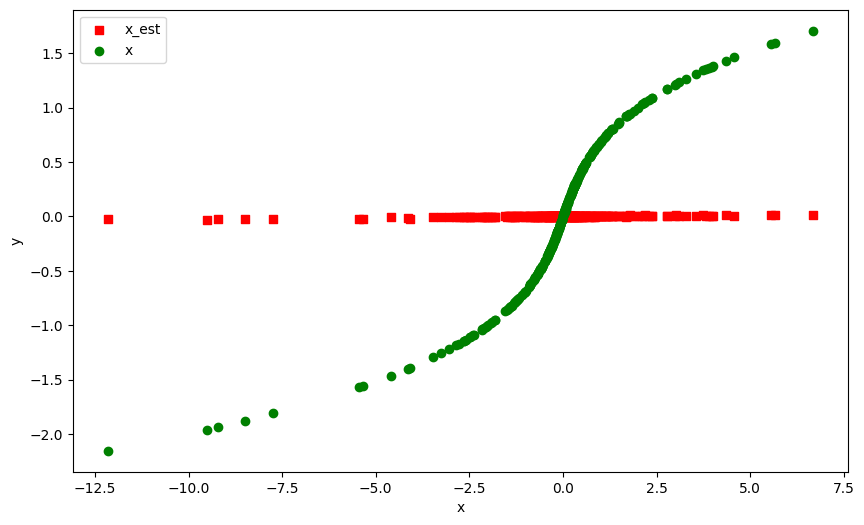

The programm is closed


In [19]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

## Standardize

In [20]:
np.random.seed(0)
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[0.5, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
x1 = epsilon[:, 0]
# x1 = torch.randn(n_samples)
x1_true = epsilon[:, 0]
x2 = x1**3 + x1
# Step 4: Combine these results into a new tensor of shape [n, 2]
X = torch.stack((x1, x2), dim=1)
X = X.numpy()
scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(X))
x2_true = x1**3 + x1 + epsilon[:, 1]
X_true = torch.stack((x1_true, x2_true), dim=1)
X_true = X_true.numpy()
scaler = StandardScaler()
X_true = torch.tensor(scaler.fit_transform(X_true))
eq_model2 = admg_rkhs2.Sigma_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs2.Sigma_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
final_W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6)
print("final_W1: ", final_W1)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 8/33000.0 [00:00<07:22, 74.50it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------

Minimize s=1.0 -- lr=0.005

Inner iteration 0
	h(W(model)): 0.07059826924341565
	score(model): 0.2390205782524989
Step 0: mle = 1.6828049381131833
Step 0: mse = 0.8418737569184791
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 0.9970]], grad_fn=<DiagEmbedBackward0>)
Found h negative -3.0531687373874696 at iter 2

Minimize s=1 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.12867436170435495
	score(model): 0.2839046823793352
Step 0: mle = 1.550726703016025
Step 0: mse = 0.7760327567042727
Step 0: Sigma = tensor([[0.9970, 0.0000],
        [0.0000, 0.9970]], grad_fn=<DiagEmbedBackward0>)


  3%|▎         | 1019/33000.0 [00:10<05:18, 100.43it/s]


Inner iteration 1000
	h(W(model)): 0.009771694599197238
	score(model): 0.06904299332720645
Step 1000: mle = 0.5925252688387235
Step 1000: mse = 0.5545870535371412
Step 1000: Sigma = tensor([[0.7836, 0.0000],
        [0.0000, 0.3018]], grad_fn=<DiagEmbedBackward0>)


  6%|▌         | 2023/33000.0 [00:20<05:06, 101.06it/s]


Inner iteration 2000
	h(W(model)): 0.009887730349473012
	score(model): 0.06877516822895935
Step 2000: mle = 0.588685122829596
Step 2000: mse = 0.5541014865186159
Step 2000: Sigma = tensor([[0.7819, 0.0000],
        [0.0000, 0.3011]], grad_fn=<DiagEmbedBackward0>)


  9%|▉         | 3020/33000.0 [00:30<04:51, 102.85it/s]


Inner iteration 3000
	h(W(model)): 0.009883550181759695
	score(model): 0.06875062548032489
Step 3000: mle = 0.5884814890964618
Step 3000: mse = 0.5540927278596064
Step 3000: Sigma = tensor([[0.7819, 0.0000],
        [0.0000, 0.3010]], grad_fn=<DiagEmbedBackward0>)


 12%|█▏        | 4019/33000.0 [00:40<04:45, 101.41it/s]


Inner iteration 4000
	h(W(model)): 0.009883016334462123
	score(model): 0.06874832276225333
Step 4000: mle = 0.5884637975551659
Step 4000: mse = 0.5540908227769294
Step 4000: Sigma = tensor([[0.7819, 0.0000],
        [0.0000, 0.3010]], grad_fn=<DiagEmbedBackward0>)


 15%|█▌        | 5019/33000.0 [00:50<04:38, 100.32it/s]


Inner iteration 4999
	h(W(model)): 0.009882498808312675
	score(model): 0.06874821115038146
Step 4999: mle = 0.5884678566712815
Step 4999: mse = 0.5540925026345106
Step 4999: Sigma = tensor([[0.7819, 0.0000],
        [0.0000, 0.3010]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=2 -- mu: 0.05 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.3347891665976141
	score(model): 0.4155883011896494
Step 0: mle = 1.6093935117433629
Step 0: mse = 0.8657804238555742
Step 0: Sigma = tensor([[0.7849, 0.0000],
        [0.0000, 0.3040]], grad_fn=<DiagEmbedBackward0>)


 18%|█▊        | 6019/33000.0 [01:00<04:22, 102.97it/s]


Inner iteration 1000
	h(W(model)): 0.002732926742493218
	score(model): 0.03804150785872409
Step 1000: mle = 0.7059890588715749
Step 1000: mse = 0.6000695585605949
Step 1000: Sigma = tensor([[0.8363, 0.0000],
        [0.0000, 0.3047]], grad_fn=<DiagEmbedBackward0>)


 21%|██▏       | 7019/33000.0 [01:10<04:11, 103.14it/s]


Inner iteration 2000
	h(W(model)): 0.0026099116665593033
	score(model): 0.03808954182661523
Step 2000: mle = 0.7094117420240484
Step 2000: mse = 0.6013675227231433
Step 2000: Sigma = tensor([[0.8378, 0.0000],
        [0.0000, 0.3033]], grad_fn=<DiagEmbedBackward0>)


 24%|██▍       | 8016/33000.0 [01:20<04:01, 103.39it/s]


Inner iteration 3000
	h(W(model)): 0.0026019855909972423
	score(model): 0.03810367293018464
Step 3000: mle = 0.7098528759910767
Step 3000: mse = 0.6014940428799835
Step 3000: Sigma = tensor([[0.8380, 0.0000],
        [0.0000, 0.3034]], grad_fn=<DiagEmbedBackward0>)


 27%|██▋       | 9015/33000.0 [01:29<03:54, 102.10it/s]


Inner iteration 4000
	h(W(model)): 0.002600774992992158
	score(model): 0.038106758685258715
Step 4000: mle = 0.7099388088854086
Step 4000: mse = 0.6015192436497734
Step 4000: Sigma = tensor([[0.8380, 0.0000],
        [0.0000, 0.3034]], grad_fn=<DiagEmbedBackward0>)


 30%|███       | 10014/33000.0 [01:39<03:46, 101.55it/s]


Inner iteration 4999
	h(W(model)): 0.0026007035182238295
	score(model): 0.038107216959527526
Step 4999: mle = 0.7099494048330979
Step 4999: mse = 0.6015231316004601
Step 4999: Sigma = tensor([[0.8380, 0.0000],
        [0.0000, 0.3034]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=3 -- mu: 0.025 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.3794942590177927
	score(model): 0.4219576382311414
Step 0: mle = 1.6922464867601459
Step 0: mse = 0.9223157867709179
Step 0: Sigma = tensor([[0.8410, 0.0000],
        [0.0000, 0.3064]], grad_fn=<DiagEmbedBackward0>)


 33%|███▎      | 11013/33000.0 [01:49<03:34, 102.31it/s]


Inner iteration 1000
	h(W(model)): 0.0007179998415953167
	score(model): 0.020538424897032306
Step 1000: mle = 0.7926356787459459
Step 1000: mse = 0.6294562910573186
Step 1000: Sigma = tensor([[0.8303, 0.0000],
        [0.0000, 0.3096]], grad_fn=<DiagEmbedBackward0>)


 36%|███▋      | 12013/33000.0 [01:59<03:25, 102.23it/s]


Inner iteration 2000
	h(W(model)): 0.0007132698230151979
	score(model): 0.020551442776133265
Step 2000: mle = 0.7933487199154934
Step 2000: mse = 0.629564257441684
Step 2000: Sigma = tensor([[0.8308, 0.0000],
        [0.0000, 0.3078]], grad_fn=<DiagEmbedBackward0>)


 39%|███▉      | 13023/33000.0 [02:09<03:14, 102.45it/s]


Inner iteration 3000
	h(W(model)): 0.0007114485832167486
	score(model): 0.020556806301031037
Step 3000: mle = 0.7936361784304213
Step 3000: mse = 0.6296353473906088
Step 3000: Sigma = tensor([[0.8309, 0.0000],
        [0.0000, 0.3079]], grad_fn=<DiagEmbedBackward0>)


 42%|████▏     | 14023/33000.0 [02:18<03:01, 104.59it/s]


Inner iteration 4000
	h(W(model)): 0.0007111803110609936
	score(model): 0.020557933429057214
Step 4000: mle = 0.7936920032757004
Step 4000: mse = 0.6296489676455491
Step 4000: Sigma = tensor([[0.8309, 0.0000],
        [0.0000, 0.3079]], grad_fn=<DiagEmbedBackward0>)


 45%|████▌     | 15013/33000.0 [02:28<02:57, 101.36it/s]


Inner iteration 4999
	h(W(model)): 0.0007111649564377831
	score(model): 0.020558067556641656
Step 4999: mle = 0.7936979837068663
Step 4999: mse = 0.6296509644904157
Step 4999: Sigma = tensor([[0.8309, 0.0000],
        [0.0000, 0.3079]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=4 -- mu: 0.0125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.3660690400306573
	score(model): 0.3873624468012563
Step 0: mle = 1.6977585962988269
Step 0: mse = 0.9420469728979353
Step 0: Sigma = tensor([[0.8339, 0.0000],
        [0.0000, 0.3109]], grad_fn=<DiagEmbedBackward0>)


 49%|████▊     | 16014/33000.0 [02:38<02:53, 98.10it/s] 


Inner iteration 1000
	h(W(model)): 0.00019462027211280264
	score(model): 0.011249631769307999
Step 1000: mle = 0.8842314967555374
Step 1000: mse = 0.650107205491605
Step 1000: Sigma = tensor([[0.7809, 0.0000],
        [0.0000, 0.3162]], grad_fn=<DiagEmbedBackward0>)


 52%|█████▏    | 17023/33000.0 [02:48<02:40, 99.80it/s] 


Inner iteration 2000
	h(W(model)): 0.00020802714243196808
	score(model): 0.011164457364262026
Step 2000: mle = 0.876337038190868
Step 2000: mse = 0.6483922184416959
Step 2000: Sigma = tensor([[0.7804, 0.0000],
        [0.0000, 0.3139]], grad_fn=<DiagEmbedBackward0>)


 55%|█████▍    | 18017/33000.0 [02:59<02:31, 99.05it/s] 


Inner iteration 3000
	h(W(model)): 0.00020752490925006448
	score(model): 0.011162097797359615
Step 3000: mle = 0.8761883533498829
Step 3000: mse = 0.6483789118900736
Step 3000: Sigma = tensor([[0.7804, 0.0000],
        [0.0000, 0.3138]], grad_fn=<DiagEmbedBackward0>)


 58%|█████▊    | 19016/33000.0 [03:09<02:20, 99.32it/s] 


Inner iteration 4000
	h(W(model)): 0.00020747220818632245
	score(model): 0.011161904508610333
Step 4000: mle = 0.8761771056782053
Step 4000: mse = 0.6483786383248235
Step 4000: Sigma = tensor([[0.7804, 0.0000],
        [0.0000, 0.3138]], grad_fn=<DiagEmbedBackward0>)


 61%|██████    | 20012/33000.0 [03:19<02:11, 98.58it/s] 


Inner iteration 4999
	h(W(model)): 0.000207469446224349
	score(model): 0.011161911509630916
Step 4999: mle = 0.8761778867912933
Step 4999: mse = 0.6483791463786432
Step 4999: Sigma = tensor([[0.7804, 0.0000],
        [0.0000, 0.3138]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=5 -- mu: 0.00625 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.402075080478654
	score(model): 0.4137449267359207
Step 0: mle = 1.8602318217605307
Step 0: mse = 0.9692253279869368
Step 0: Sigma = tensor([[0.7834, 0.0000],
        [0.0000, 0.3168]], grad_fn=<DiagEmbedBackward0>)


 64%|██████▎   | 21017/33000.0 [03:29<01:58, 100.89it/s]


Inner iteration 1000
	h(W(model)): 5.8066335285242586e-05
	score(model): 0.006309936389479773
Step 1000: mle = 1.000072181295041
Step 1000: mse = 0.6669161805406885
Step 1000: Sigma = tensor([[0.7032, 0.0000],
        [0.0000, 0.3209]], grad_fn=<DiagEmbedBackward0>)


 67%|██████▋   | 22013/33000.0 [03:39<01:51, 98.88it/s] 


Inner iteration 2000
	h(W(model)): 6.748683337665645e-05
	score(model): 0.0062393424794834704
Step 2000: mle = 0.9873234797457937
Step 2000: mse = 0.6644900518111257
Step 2000: Sigma = tensor([[0.7039, 0.0000],
        [0.0000, 0.3199]], grad_fn=<DiagEmbedBackward0>)


 70%|██████▉   | 23019/33000.0 [03:49<01:41, 98.53it/s] 


Inner iteration 3000
	h(W(model)): 6.683678256987438e-05
	score(model): 0.006237775069161879
Step 3000: mle = 0.9871758025696105
Step 3000: mse = 0.6645019907705543
Step 3000: Sigma = tensor([[0.7040, 0.0000],
        [0.0000, 0.3198]], grad_fn=<DiagEmbedBackward0>)


 73%|███████▎  | 24014/33000.0 [03:59<01:30, 99.12it/s] 


Inner iteration 4000
	h(W(model)): 6.678008176327339e-05
	score(model): 0.006237746245161755
Step 4000: mle = 0.9871802266560223
Step 4000: mse = 0.6645055898695295
Step 4000: Sigma = tensor([[0.7040, 0.0000],
        [0.0000, 0.3198]], grad_fn=<DiagEmbedBackward0>)


 76%|███████▌  | 25020/33000.0 [04:10<01:20, 99.51it/s] 


Inner iteration 4999
	h(W(model)): 6.677861712564636e-05
	score(model): 0.006237749594955504
Step 4999: mle = 0.9871809954940483
Step 4999: mse = 0.6645058874289466
Step 4999: Sigma = tensor([[0.7040, 0.0000],
        [0.0000, 0.3198]], grad_fn=<DiagEmbedBackward0>)

Dagma iter t=6 -- mu: 0.003125 ------------------------------

Minimize s=1.0 -- lr=0.0025

Inner iteration 0
	h(W(model)): 0.42412672543094526
	score(model): 0.4307249384382502
Step 0: mle = 2.102269826928527
Step 0: mse = 0.9959085247906274
Step 0: Sigma = tensor([[0.7070, 0.0000],
        [0.0000, 0.3228]], grad_fn=<DiagEmbedBackward0>)


 79%|███████▉  | 26019/33000.0 [04:20<01:10, 99.64it/s] 


Inner iteration 1000
	h(W(model)): 2.507357281829125e-05
	score(model): 0.0038010336803844047
Step 1000: mle = 1.2081758959612285
Step 1000: mse = 0.6921238942631787
Step 1000: Sigma = tensor([[0.6144, 0.0000],
        [0.0000, 0.3376]], grad_fn=<DiagEmbedBackward0>)


 82%|████████▏ | 27021/33000.0 [04:30<01:00, 98.68it/s] 


Inner iteration 2000
	h(W(model)): 2.4644565710781476e-05
	score(model): 0.003635532064502521
Step 2000: mle = 1.1553195014377997
Step 2000: mse = 0.6824682747247547
Step 2000: Sigma = tensor([[0.6157, 0.0000],
        [0.0000, 0.3222]], grad_fn=<DiagEmbedBackward0>)


 85%|████████▍ | 28016/33000.0 [04:40<00:50, 98.75it/s] 


Inner iteration 3000
	h(W(model)): 2.4308279365329953e-05
	score(model): 0.0036299920613228295
Step 3000: mle = 1.153653546316988
Step 3000: mse = 0.6822052906155549
Step 3000: Sigma = tensor([[0.6157, 0.0000],
        [0.0000, 0.3218]], grad_fn=<DiagEmbedBackward0>)


 88%|████████▊ | 29014/33000.0 [04:51<00:40, 99.58it/s] 


Inner iteration 4000
	h(W(model)): 2.4275528692175793e-05
	score(model): 0.003629677117754004
Step 4000: mle = 1.153563117417313
Step 4000: mse = 0.6821916795925596
Step 4000: Sigma = tensor([[0.6157, 0.0000],
        [0.0000, 0.3218]], grad_fn=<DiagEmbedBackward0>)


 91%|█████████ | 30014/33000.0 [05:01<00:31, 94.61it/s] 


Inner iteration 5000
	h(W(model)): 2.4275450813691218e-05
	score(model): 0.0036296718726225464
Step 5000: mle = 1.153561460597448
Step 5000: mse = 0.6821913648628938
Step 5000: Sigma = tensor([[0.6157, 0.0000],
        [0.0000, 0.3218]], grad_fn=<DiagEmbedBackward0>)


 94%|█████████▍| 31022/33000.0 [05:11<00:20, 95.99it/s] 


Inner iteration 6000
	h(W(model)): 2.4295706320600532e-05
	score(model): 0.0036296281635691567
Step 6000: mle = 1.1535406856379613
Step 6000: mse = 0.6821876543840703
Step 6000: Sigma = tensor([[0.6157, 0.0000],
        [0.0000, 0.3218]], grad_fn=<DiagEmbedBackward0>)


 97%|█████████▋| 32015/33000.0 [05:21<00:10, 97.36it/s] 


Inner iteration 7000
	h(W(model)): 2.4335229042688332e-05
	score(model): 0.0036296852481789467
Step 7000: mle = 1.1535459897833638
Step 7000: mse = 0.6821924453736853
Step 7000: Sigma = tensor([[0.6157, 0.0000],
        [0.0000, 0.3218]], grad_fn=<DiagEmbedBackward0>)


33002it [05:31, 99.49it/s]                              


Inner iteration 7999
	h(W(model)): 2.755560912992608e-05
	score(model): 0.0036327536296875827
Step 7999: mle = 1.1534991468465459
Step 7999: mse = 0.6821579122104301
Step 7999: Sigma = tensor([[0.6157, 0.0000],
        [0.0000, 0.3218]], grad_fn=<DiagEmbedBackward0>)
final_W1:  tensor([[1.0000e-08, 8.1721e-01],
        [6.4234e-03, 1.0000e-08]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.6157, 0.0000],
        [0.0000, 0.3218]], grad_fn=<DiagEmbedBackward0>)
final_W1:  [[1.00000000e-08 8.17213925e-01]
 [6.42341909e-03 1.00000000e-08]]
Empirical Covariance Matrix: [[0.49684325 0.00285144]
 [0.00285144 1.53782405]]
estimated Sigma:  [[0.61573717 0.        ]
 [0.         0.32182736]]


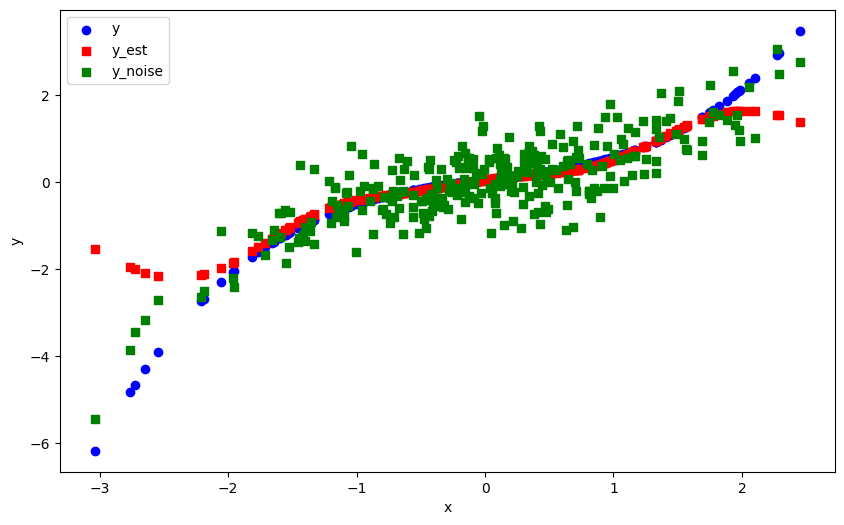

The programm is closed


In [21]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='green', marker='s') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

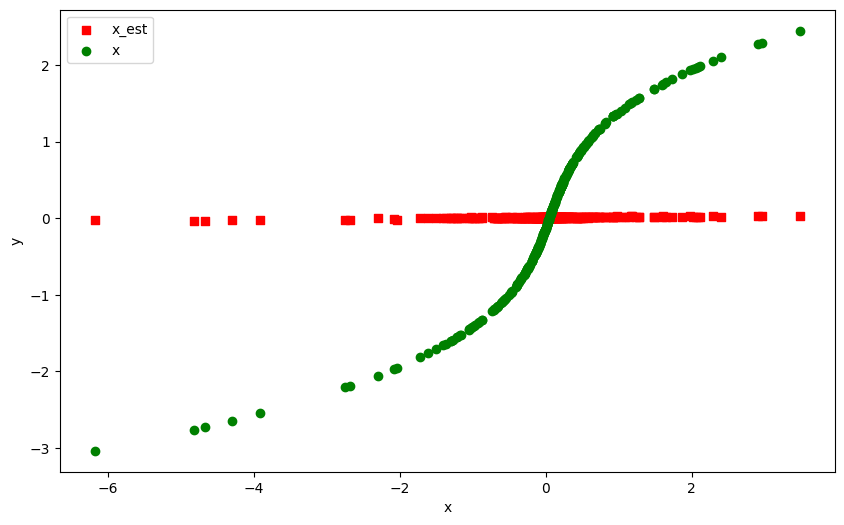

The programm is closed


In [22]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")